# Joint Network Model evaluation

In [1]:
from interp.models import DummyJointModel
from interp.train import evaluate_joint
from interp.dataset import HDF5Dataset, nested_custom_collate
from torch.utils.data import DataLoader
import os

alg = "bellman_ford_bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=True)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=True)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=True)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=nested_custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=True)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/bellman_ford_bfs/interp_data_OOD_eval.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [2]:
m = DummyJointModel()
print("performing evaluation on OOD dataset")
print(evaluate_joint(m, val_dataloader_ood, "cpu"))
print("performing evaluation on 16 dataset")
print(evaluate_joint(m, val_dataloader_16, "cpu"))
print("performing evaluation on 8 dataset")
print(evaluate_joint(m, val_dataloader_8, "cpu"))
print("performing evaluation on all dataset")
print(evaluate_joint(m, val_dataloader_all, "cpu"))


performing evaluation on OOD dataset


NameError: name 'val_dataloader_ood' is not defined

In [3]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate_joint(model, val_dataloader_ood, "cpu"))
print("performing evaluation on 16 dataset")
print(evaluate_joint(model, val_dataloader_16, "cpu"))
print("performing evaluation on 8 dataset")
print(evaluate_joint(model, val_dataloader_8, "cpu"))
print("performing evaluation on all dataset")
print(evaluate_joint(model, val_dataloader_all, "cpu"))

performing evaluation on OOD dataset
(0.2754781371853604, {'bellman_ford': 0.1884538551209388, 'bfs': 0.362502419249782})
performing evaluation on 16 dataset
(0.0838113730271028, {'bellman_ford': 0.059216358357282874, 'bfs': 0.10840638769692272})
performing evaluation on 8 dataset
(0.05049937276329627, {'bellman_ford': 0.02702308467274604, 'bfs': 0.07397566085384649})
performing evaluation on all dataset
(0.06406357517081746, {'bellman_ford': 0.04593573106014741, 'bfs': 0.08219141928148752})


# Single algorithm training evaluation

In [7]:
from interp.models import DummyModel
from interp.train import evaluate
from interp.dataset import HDF5Dataset, custom_collate
from torch.utils.data import DataLoader
import os

alg = "bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=False)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=False)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=False)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=False)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=custom_collate)

In [8]:
m = DummyModel()
print("performing evaluation on OOD dataset")
print(evaluate(m, val_dataloader_ood, "cpu"))
print("performing evaluation on 16 dataset")
print(evaluate(m, val_dataloader_16, "cpu"))
print("performing evaluation on 8 dataset")
print(evaluate(m, val_dataloader_8, "cpu"))
print("performing evaluation on all dataset")
print(evaluate(m, val_dataloader_all, "cpu"))

performing evaluation on OOD dataset
4.378232815206768
performing evaluation on 16 dataset
2.641170819009547
performing evaluation on 8 dataset
1.8725684665205624
performing evaluation on all dataset
2.252141742611517


In [9]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate(model, val_dataloader_ood, "cpu"))
print("performing evaluation on 16 dataset")
print(evaluate(model, val_dataloader_16, "cpu"))
print("performing evaluation on 8 dataset")
print(evaluate(model, val_dataloader_8, "cpu"))
print("performing evaluation on all dataset")
print(evaluate(model, val_dataloader_all, "cpu"))

performing evaluation on OOD dataset
0.35293075903315874
performing evaluation on 16 dataset
0.10563356048451542
performing evaluation on 8 dataset
0.0758527074026126
performing evaluation on all dataset
0.08376356629893539


# Visualisation

## Getting singular model stats

Evaluating: 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]


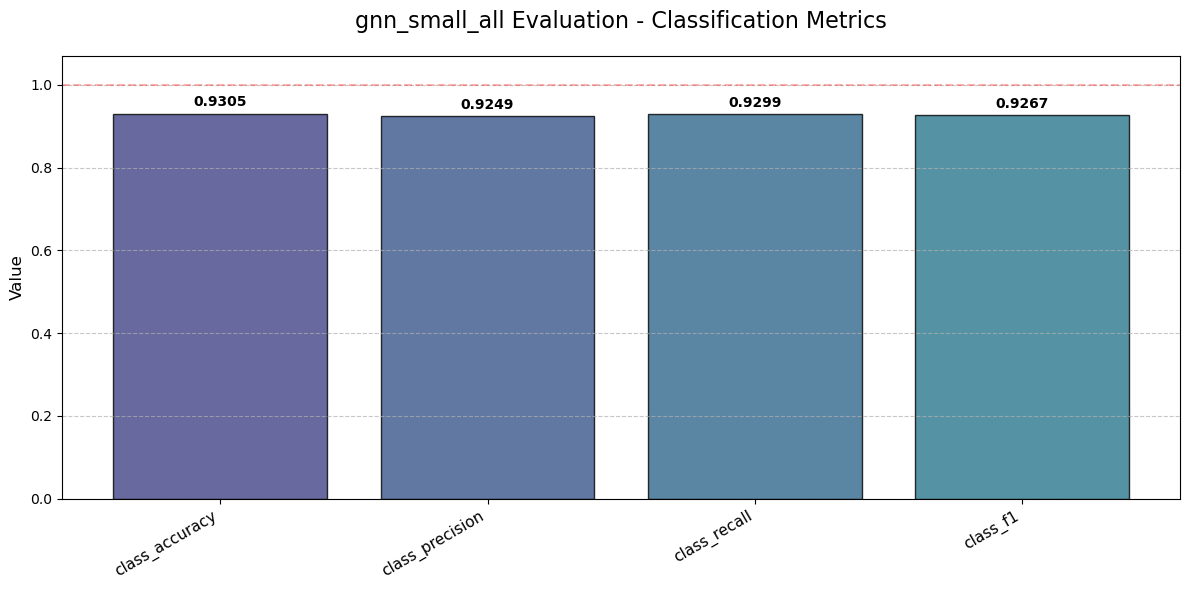

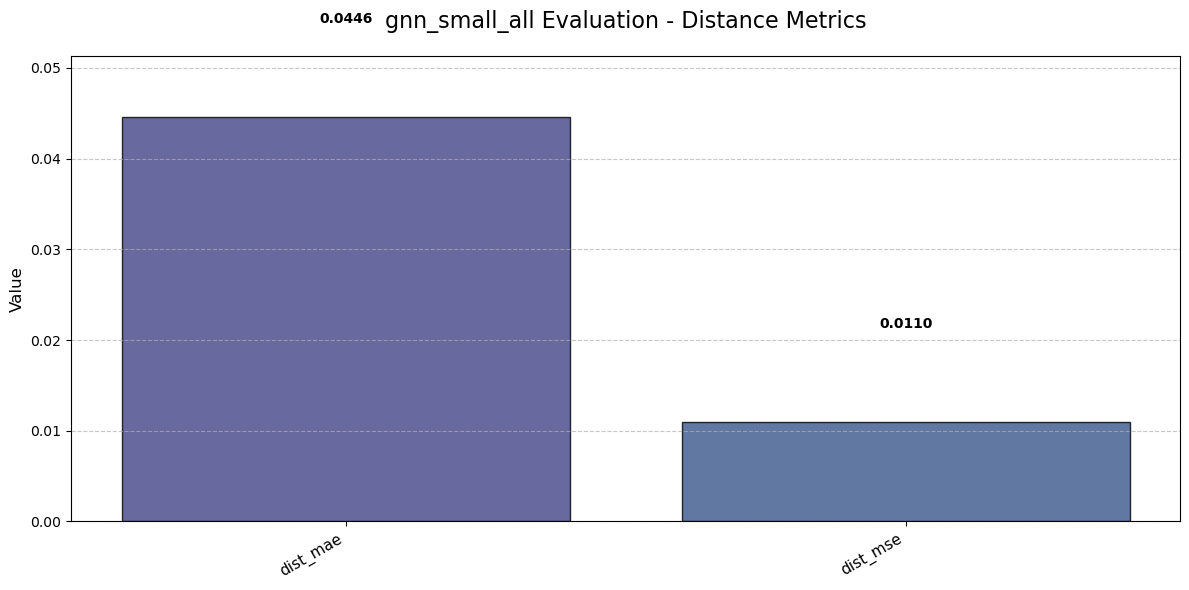

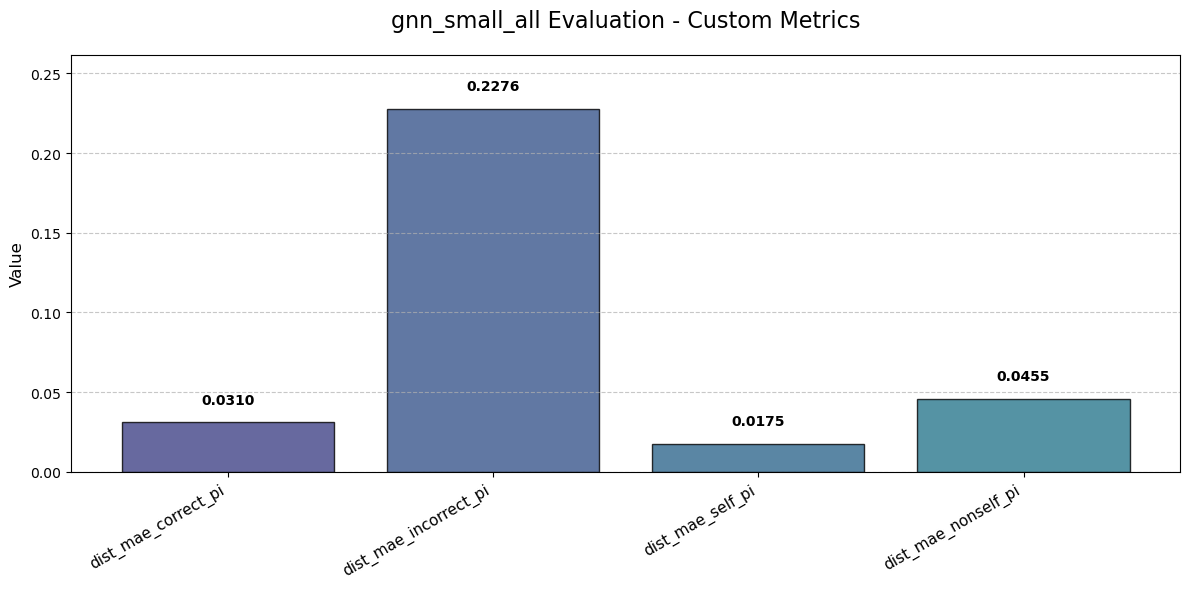

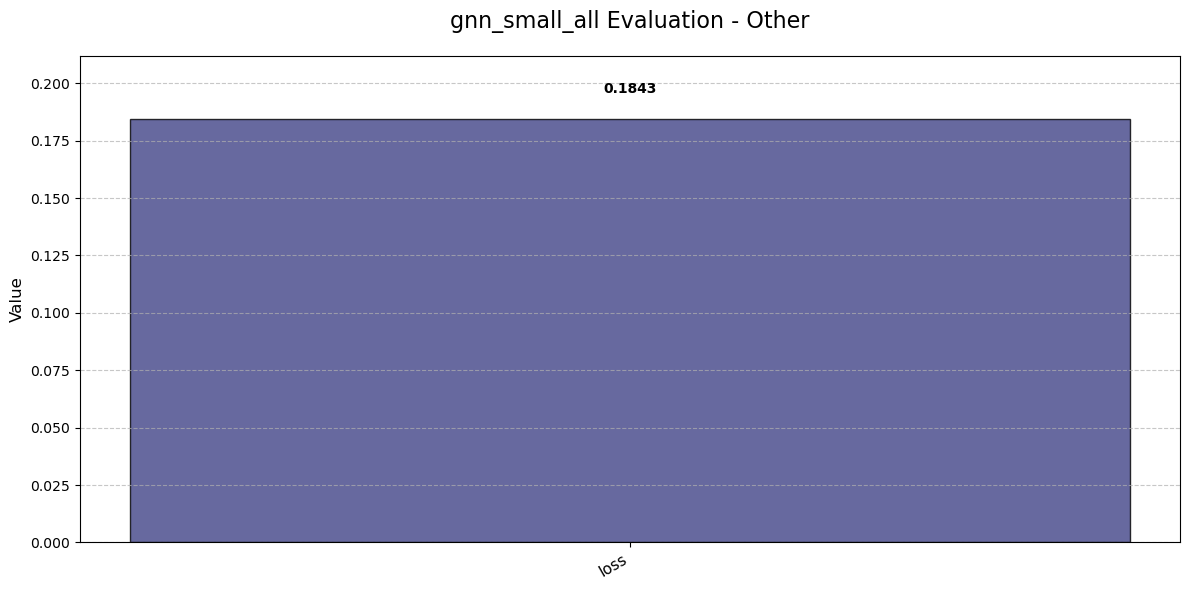

In [1]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/bellman_ford/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/bellman_ford/interp_data_OOD_eval.h5",
    batch_size=16
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")

## Comparing Multiple Models

Evaluating MLP...


Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]


Evaluating GNN...


Evaluating: 100%|██████████| 5/5 [00:00<00:00,  6.64it/s]


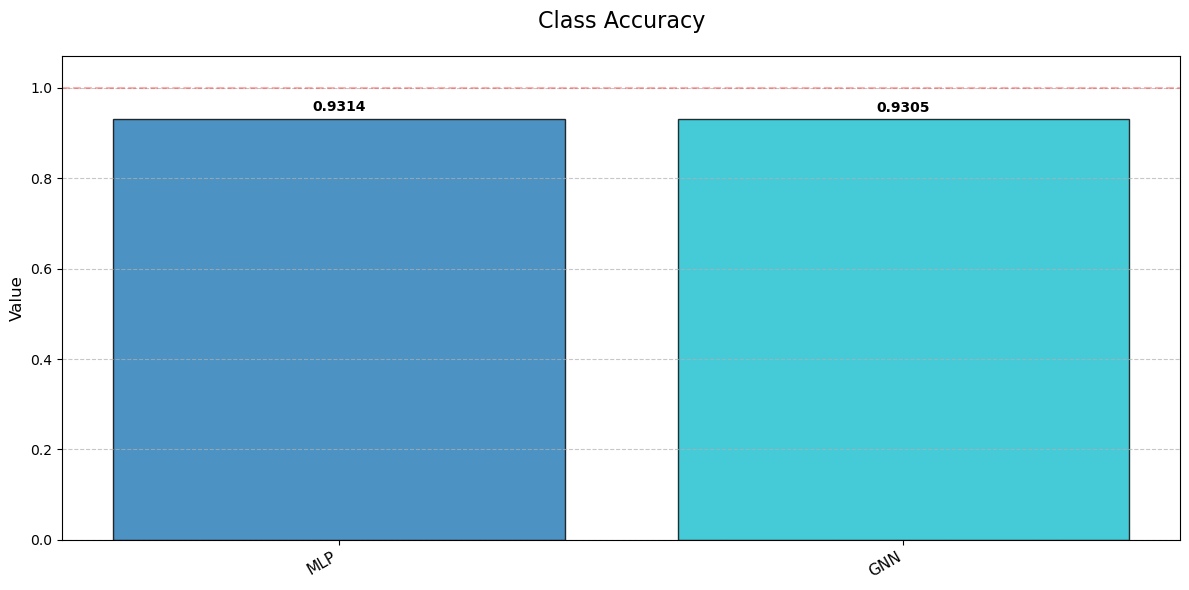

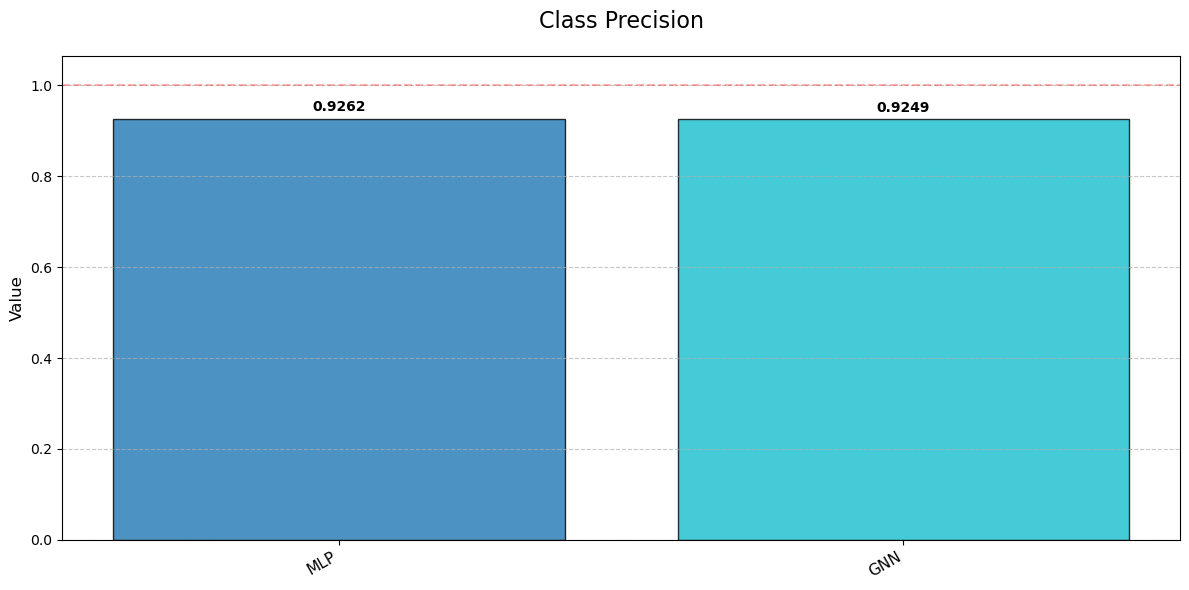

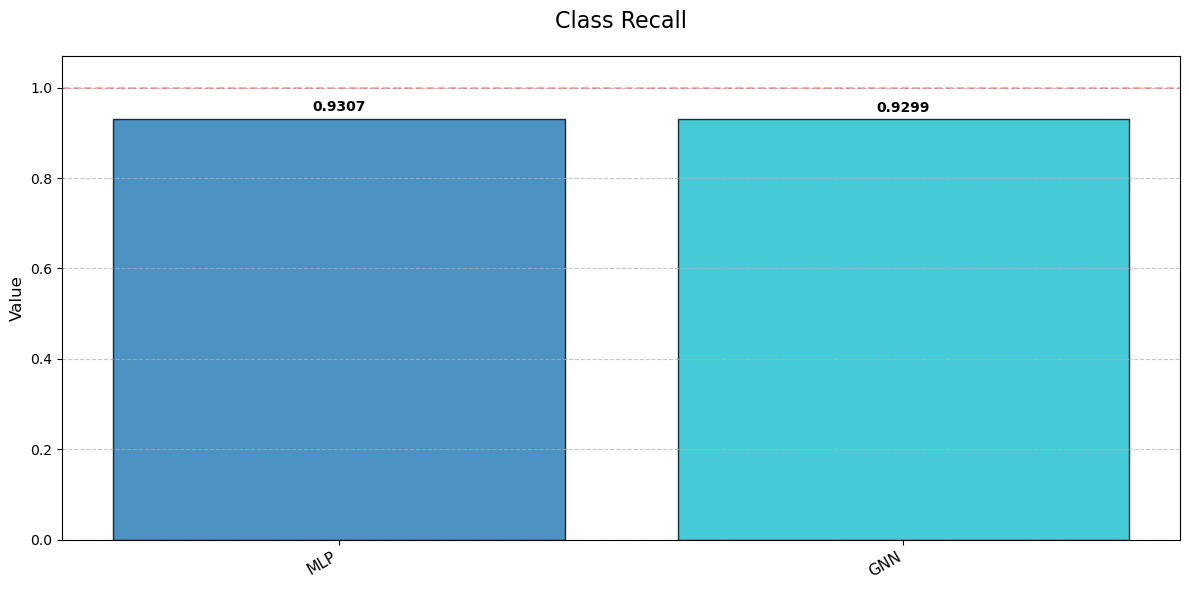

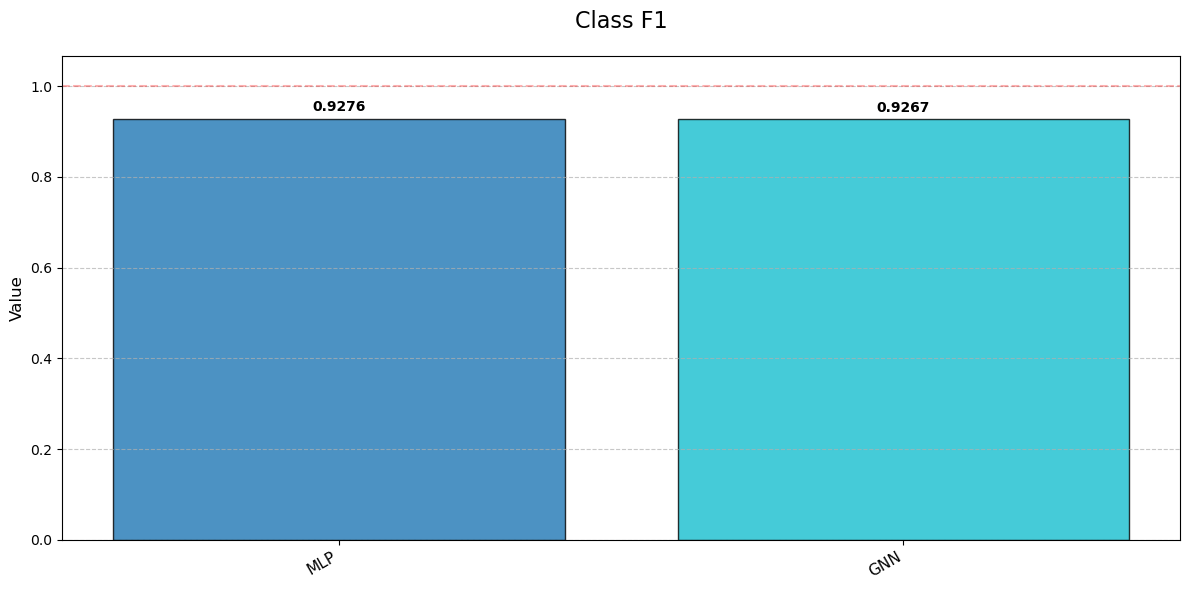

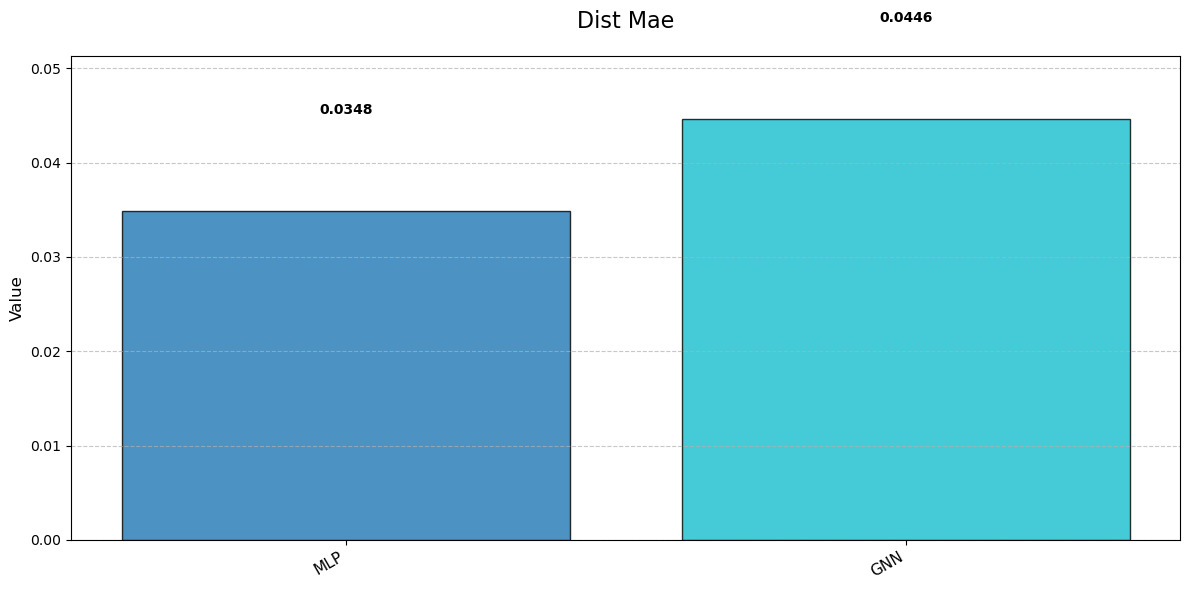

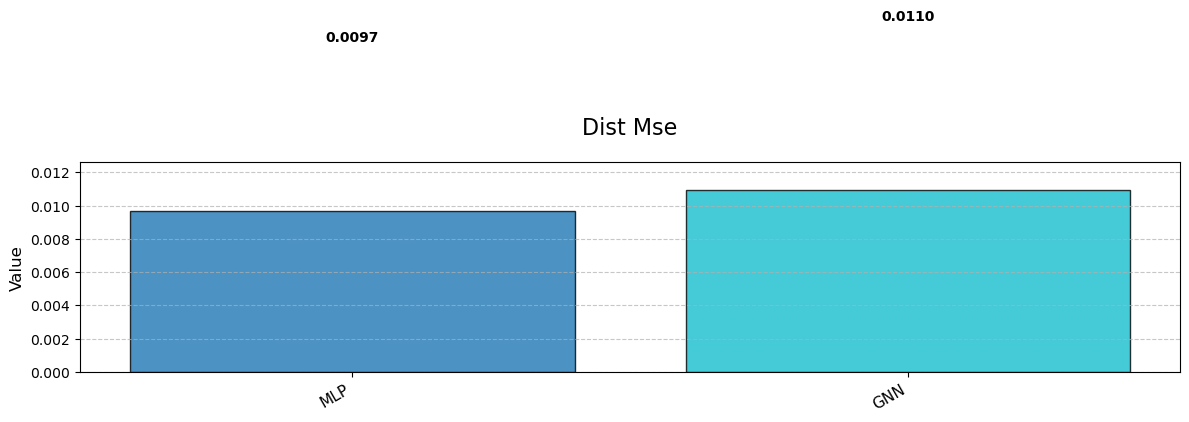

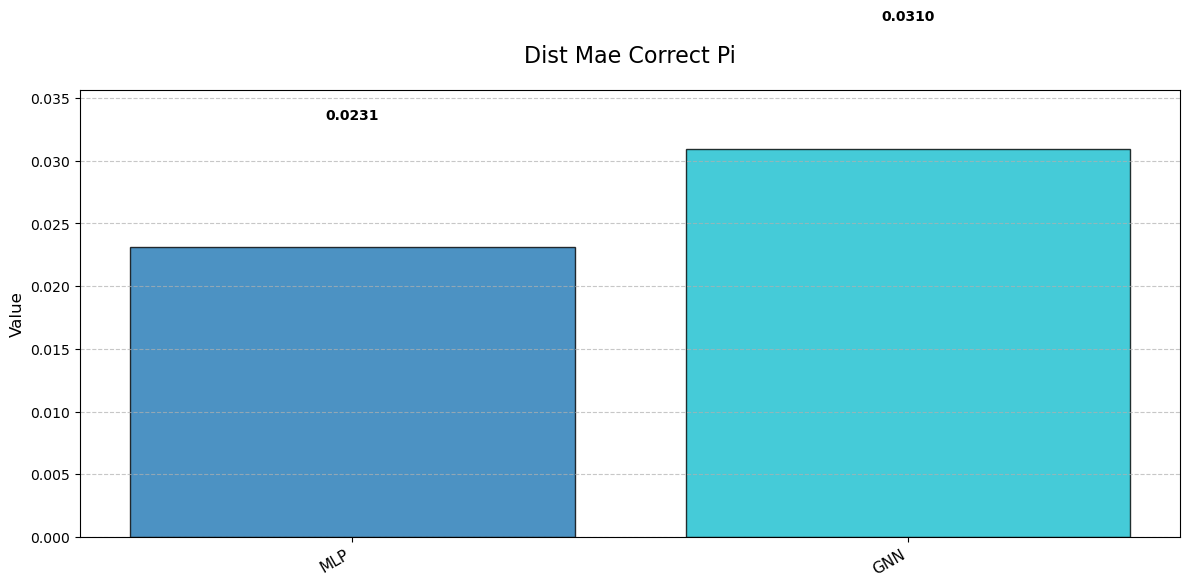

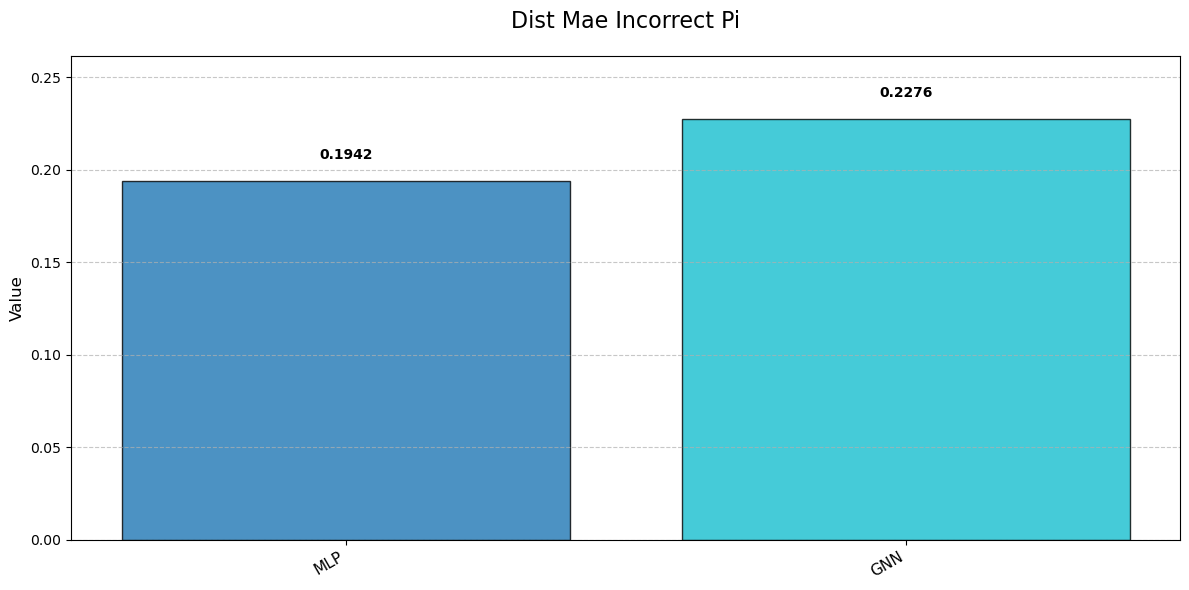

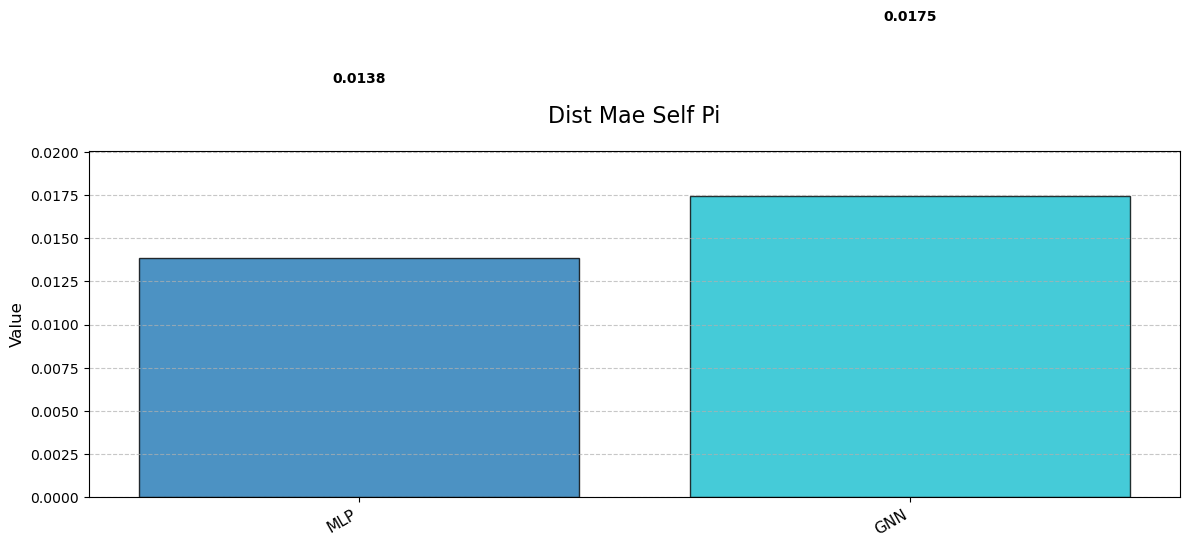

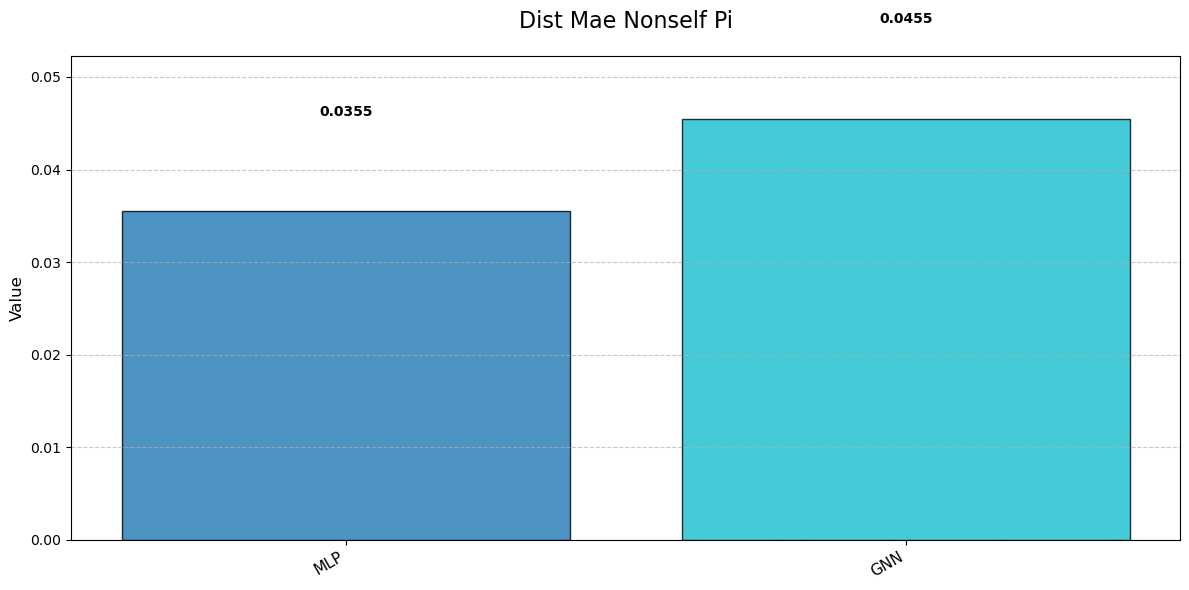

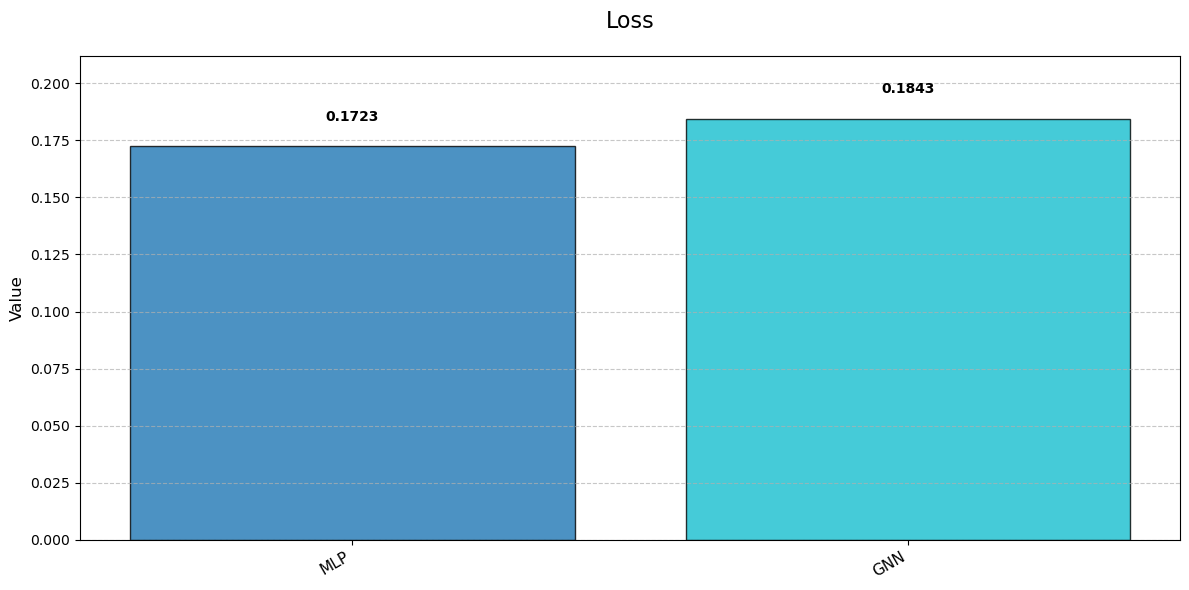

In [4]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import compare_models, visualize_comparison
import torch
import os

# Define model configurations and paths
model_configs = [
    {
        "name": "MLP",
        "checkpoint_dir": "interp_checkpoints/bellman_ford/mlp_diff_all",
        "model_name": "mlp_diff_all"
    },
    {
        "name": "GNN",
        "checkpoint_dir": "interp_checkpoints/bellman_ford/gnn_small_all",
        "model_name": "gnn_small_all"
    },
]

# Load models from configs
models = []
model_names = []

for model_config in model_configs:
    config_path = os.path.join(model_config["checkpoint_dir"], f"{model_config['model_name']}_config.json")
    model_path = os.path.join(model_config["checkpoint_dir"], f"{model_config['model_name']}.pth")
    
    # Load the configuration
    config = load_config(config_path)
    
    # Create the model from the configuration
    model = create_model_from_config(config)
    
    # Load the saved weights
    model.load_state_dict(torch.load(model_path))
    
    models.append(model)
    model_names.append(model_config["name"])

# Compare models
comparison_results = compare_models(
    models,
    model_names,
    dataset_path="data/bellman_ford/interp_data_OOD_eval.h5",
    batch_size=16
)

# Visualize comparison
visualize_comparison(comparison_results)

## Visualise examples

Performing comprehensive model behavior analysis...


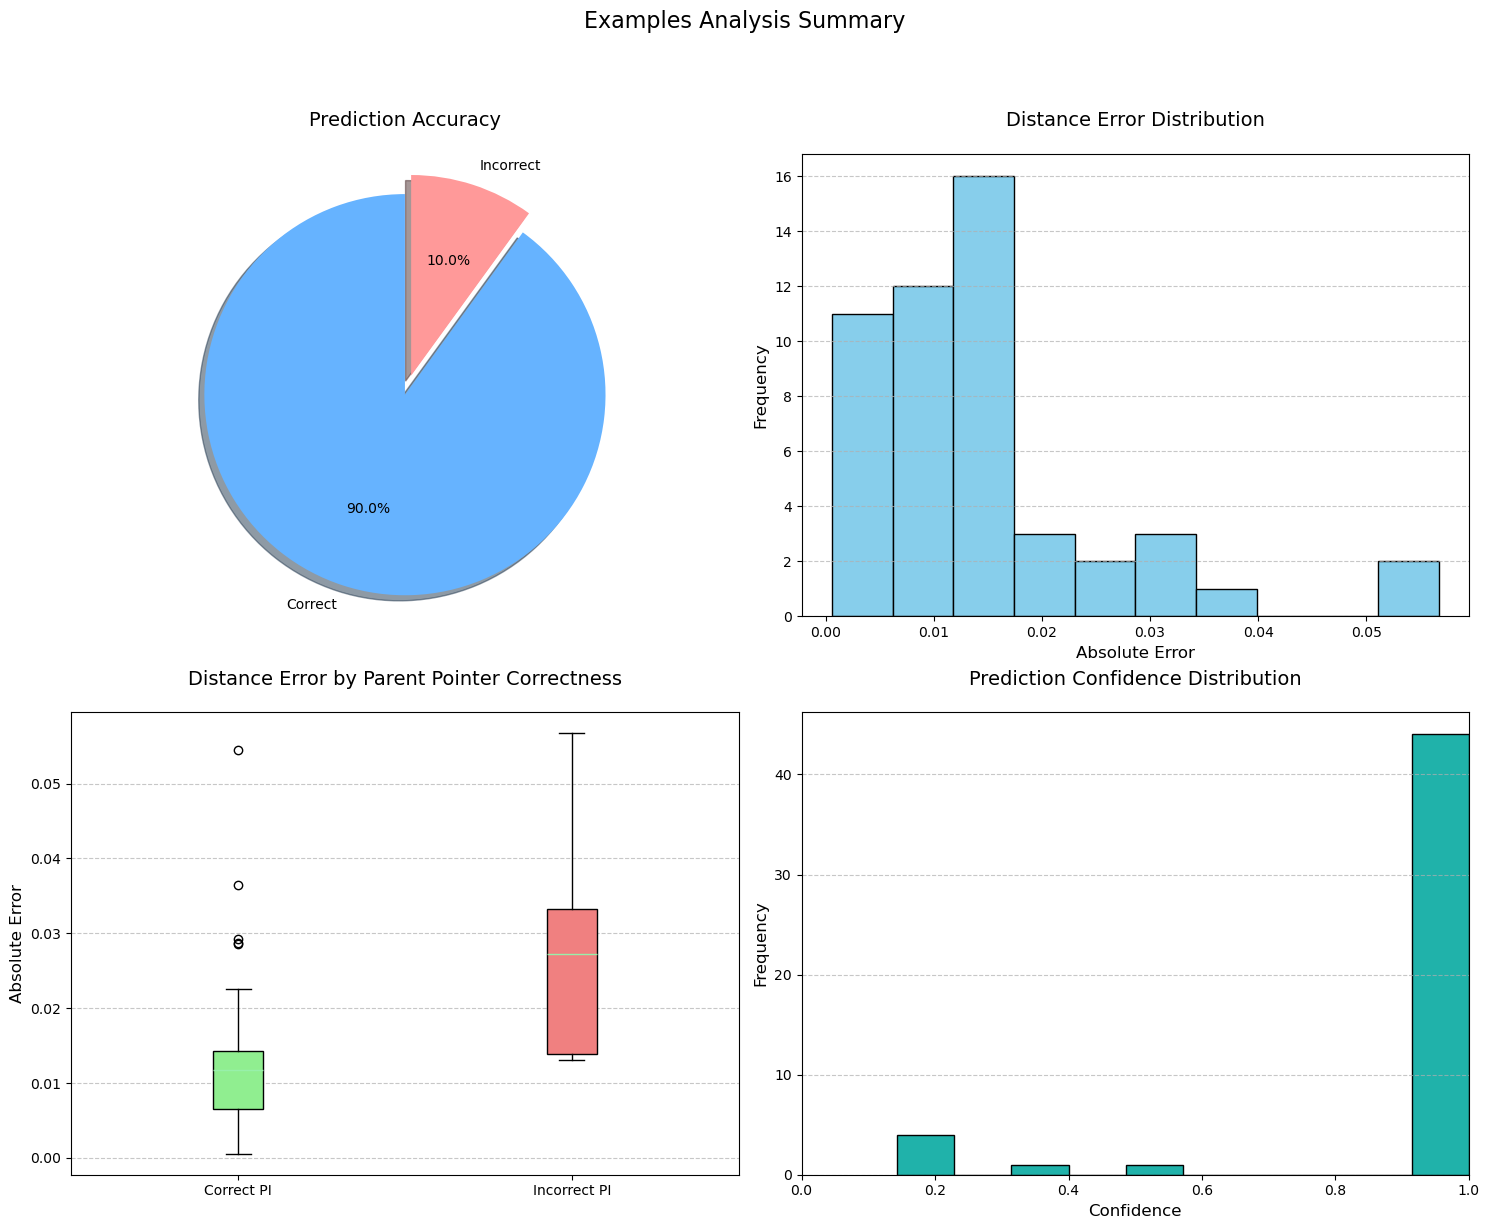


===== Model Behavior Analysis =====
Number of examples analyzed: 50
Accuracy: 0.9000
Average distance error: 0.0143
Average distance error (correct PI): 0.0127
Average distance error (incorrect PI): 0.0288
Average confidence: 0.9104
Average confidence (correct): 0.9889
Average confidence (incorrect): 0.2038


Visualizing example 1 (incorrect)...


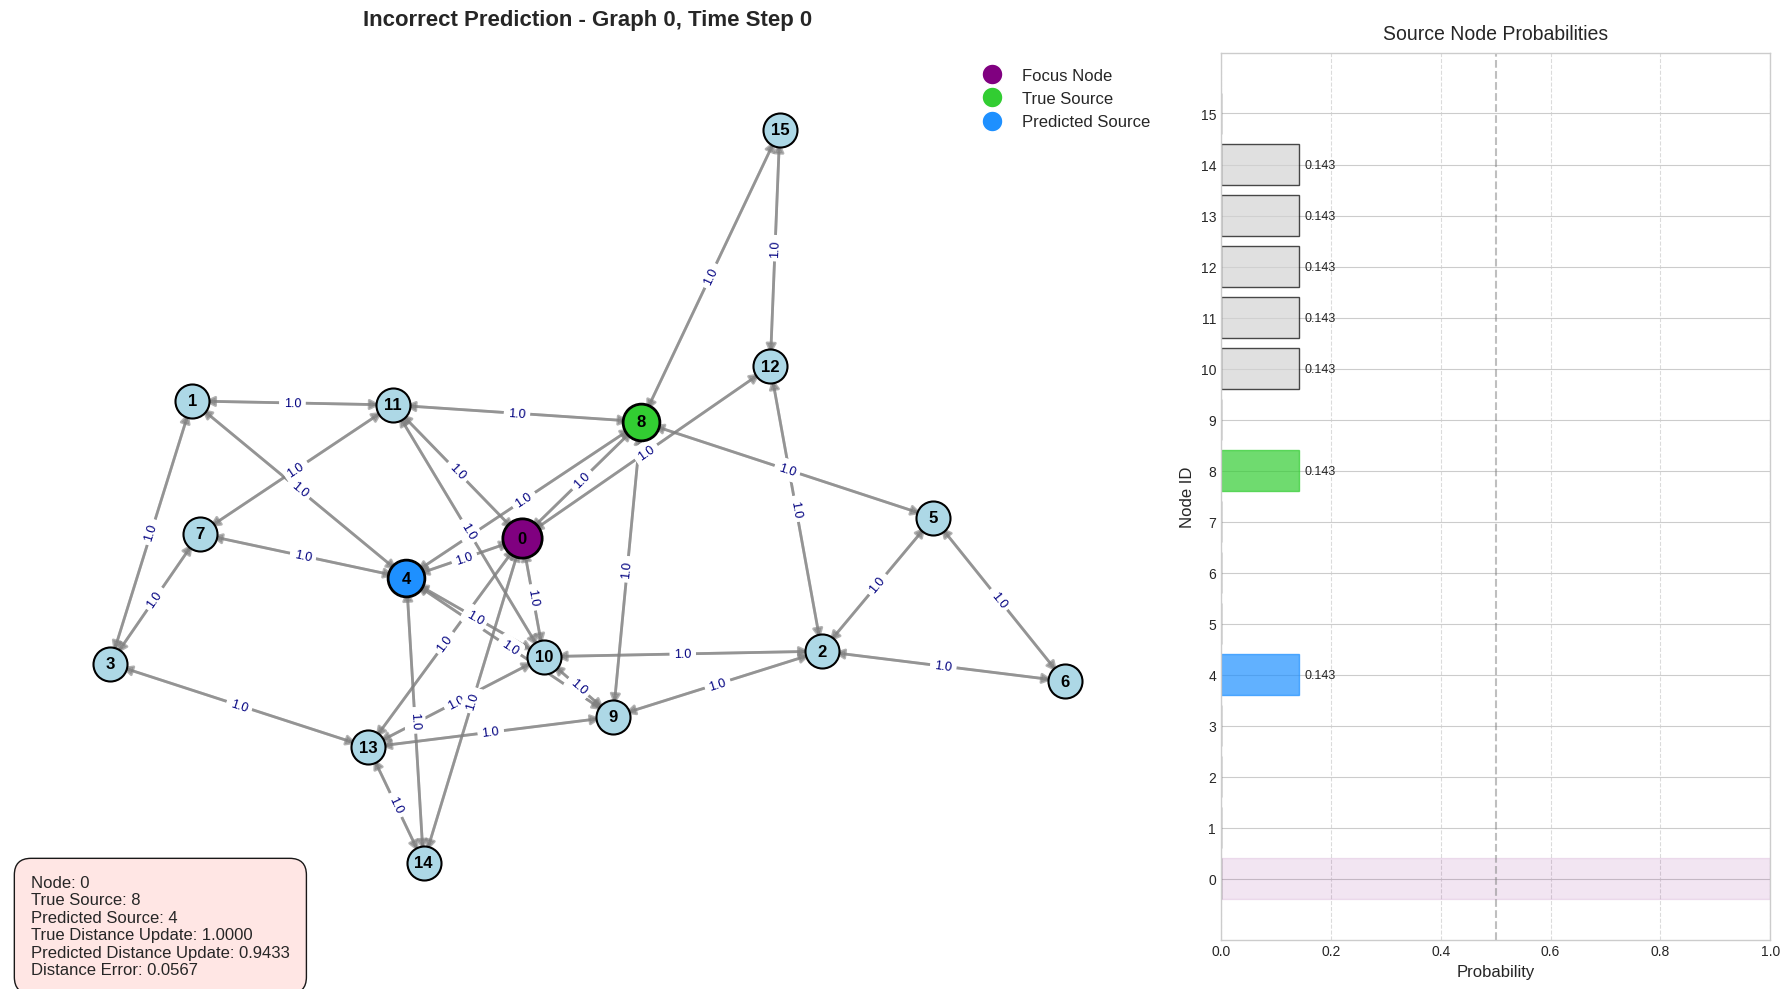


Visualizing example 2 (correct)...


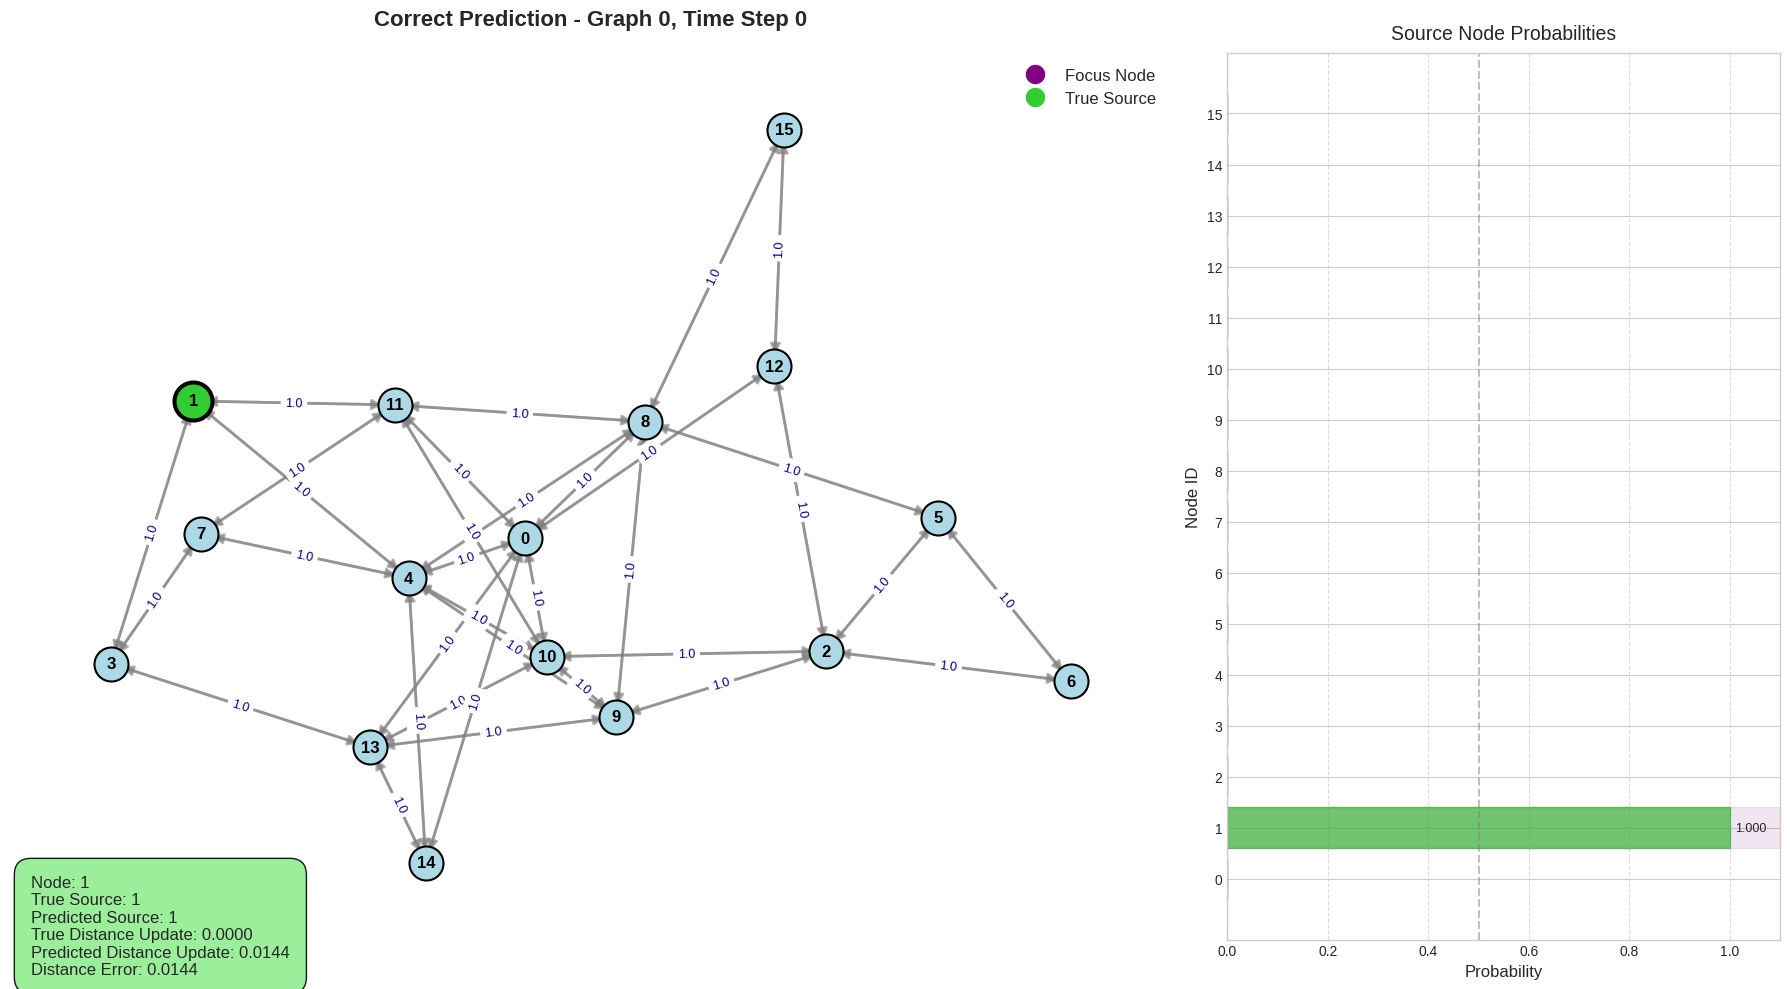


Visualizing example 3 (correct)...


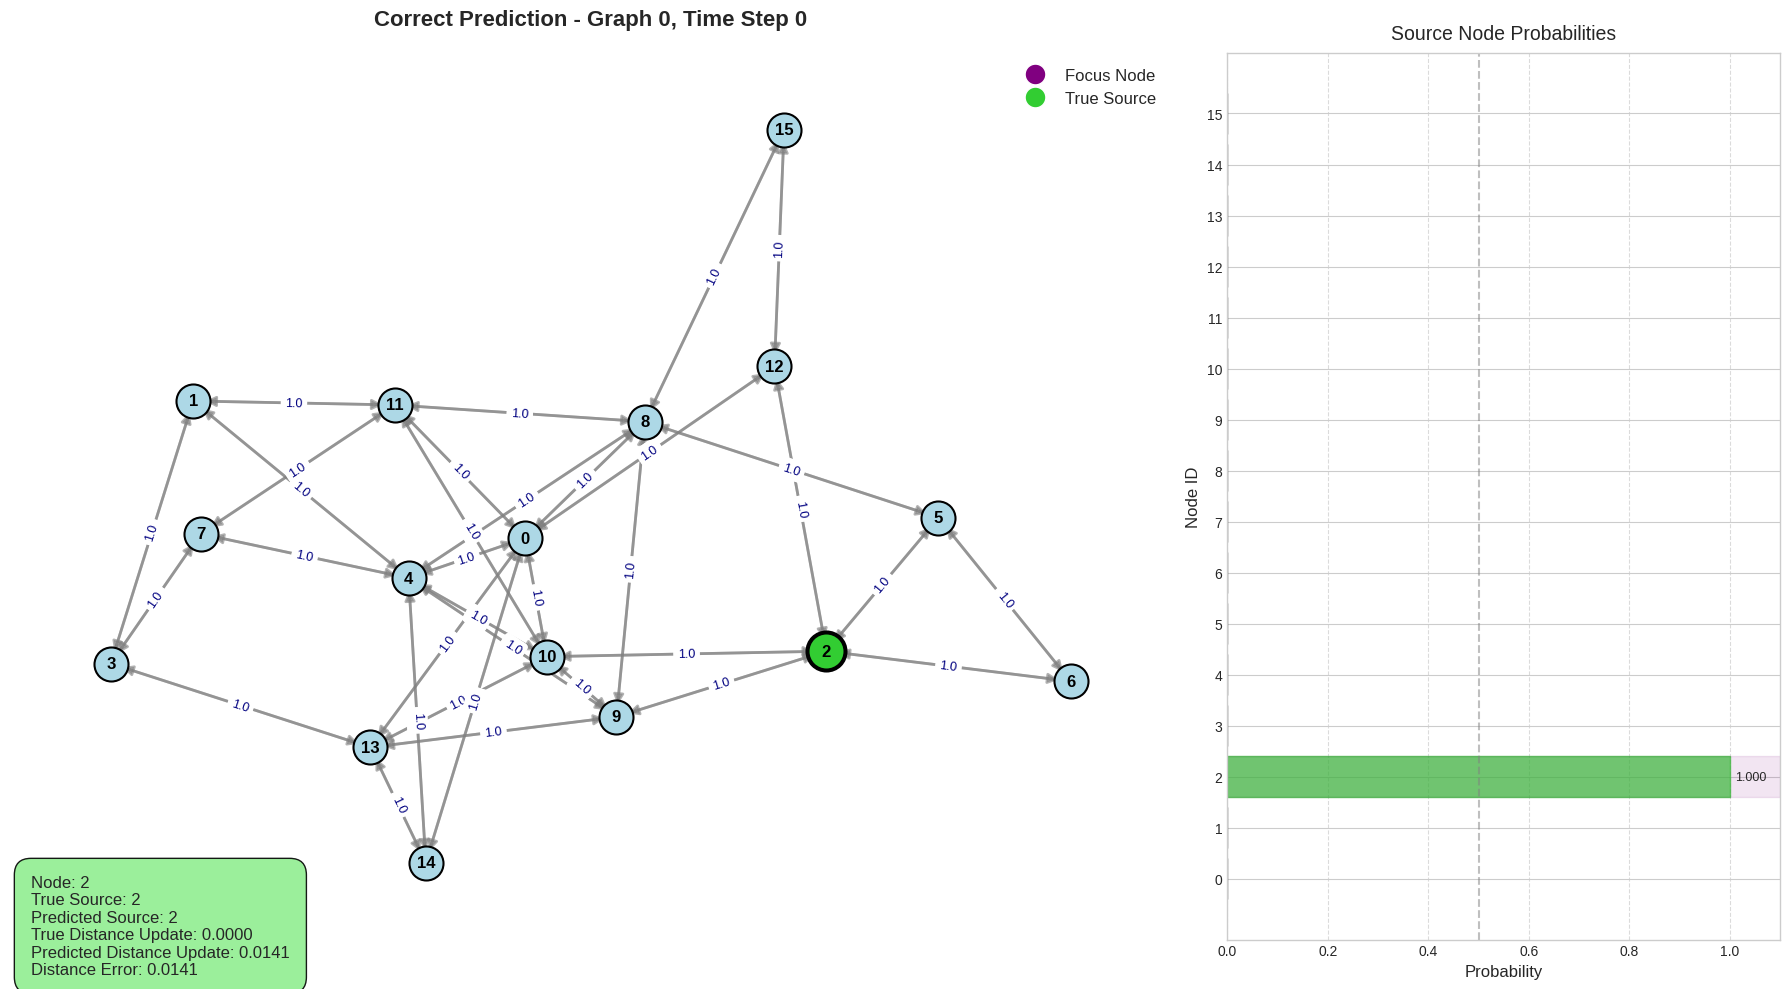


Visualizing example 4 (correct)...


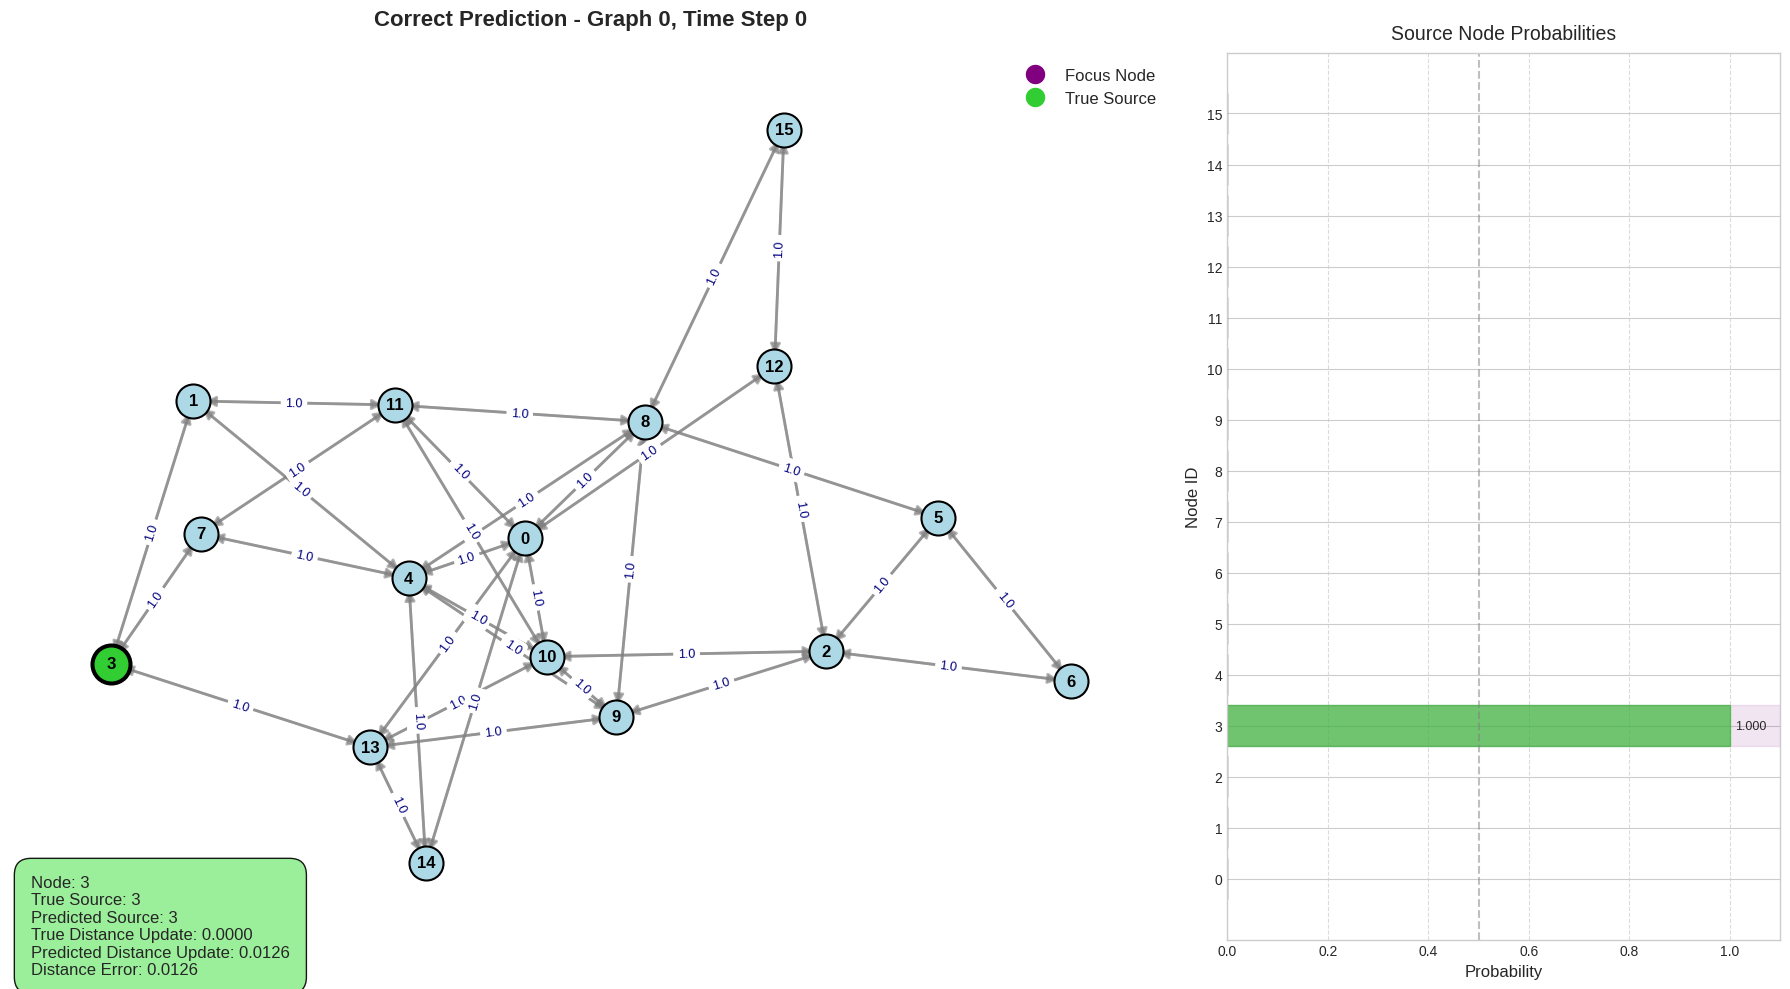


Visualizing example 5 (incorrect)...


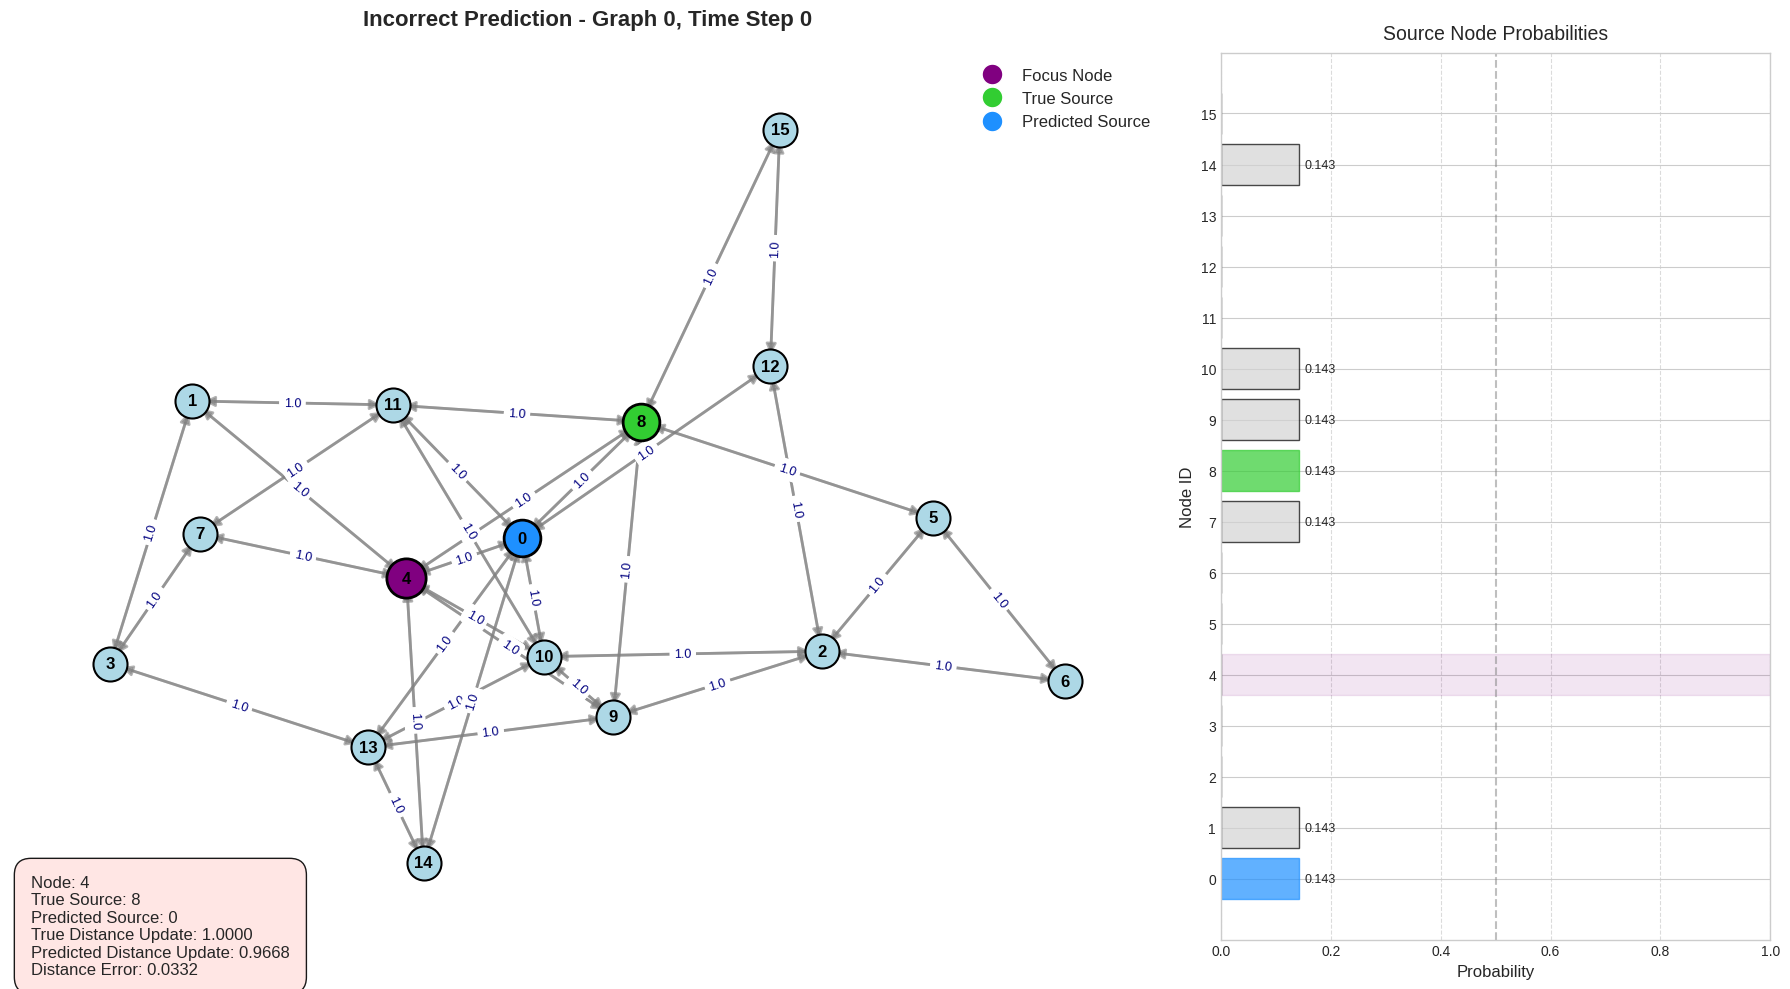



Visualizing error example 1...


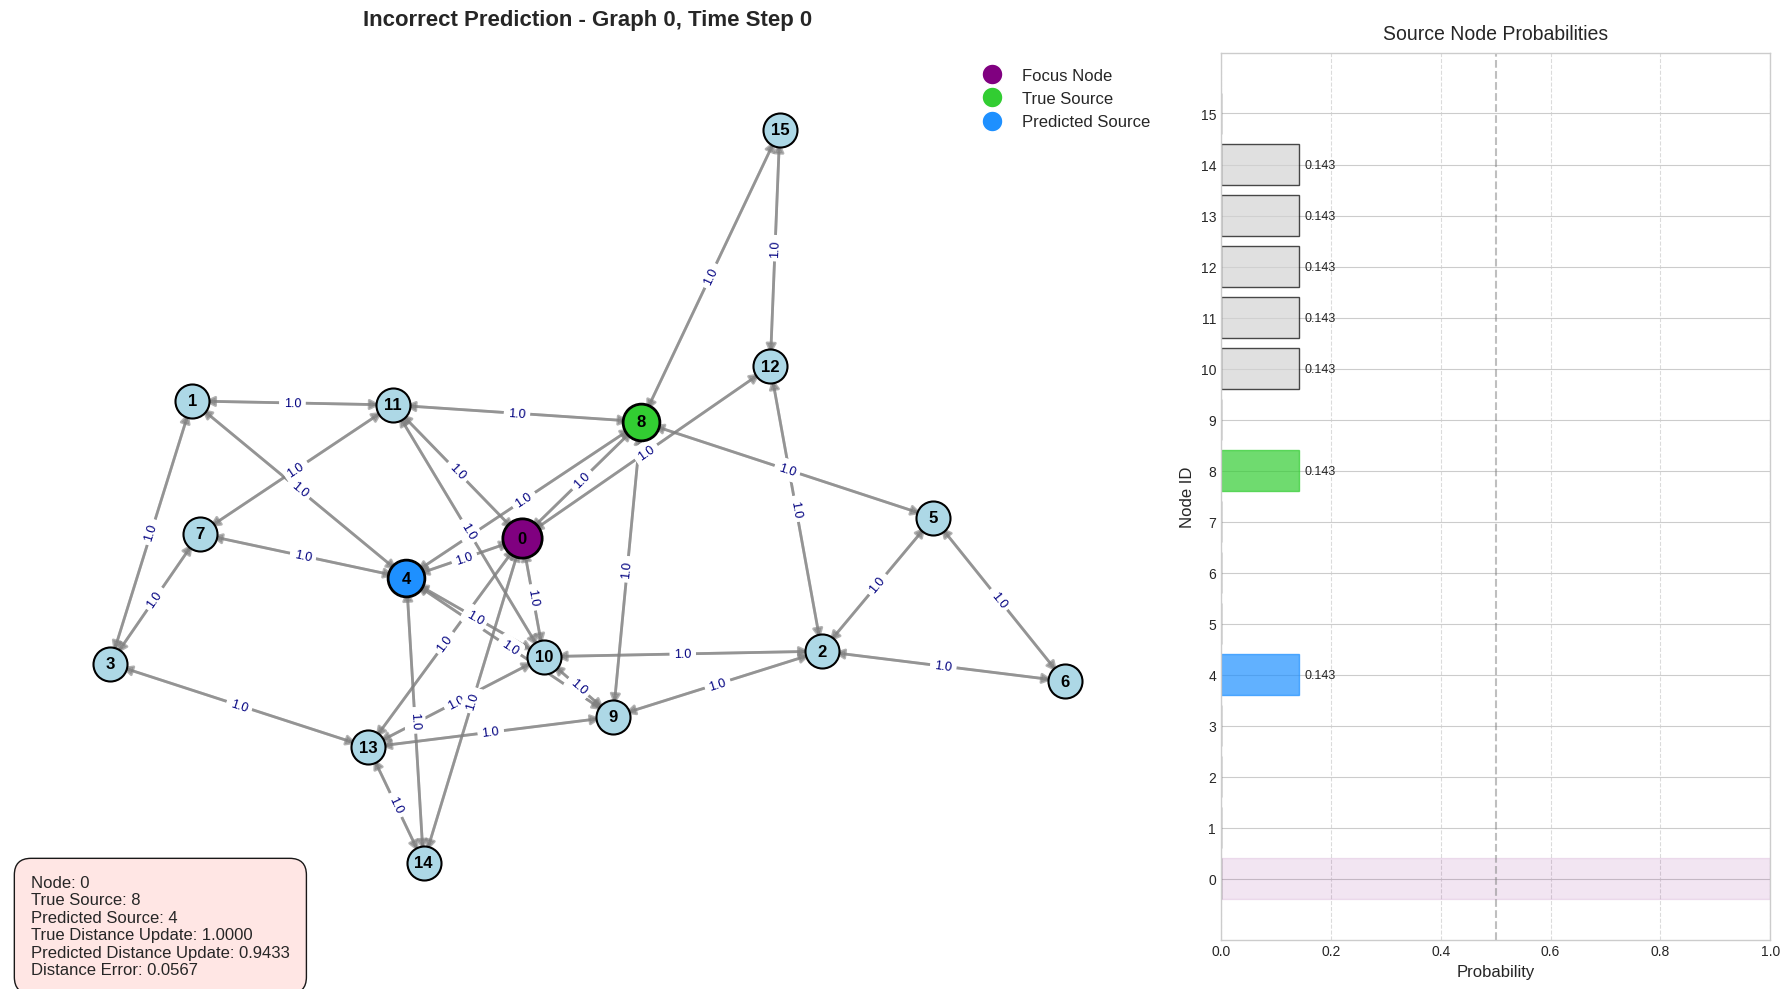


Visualizing error example 2...


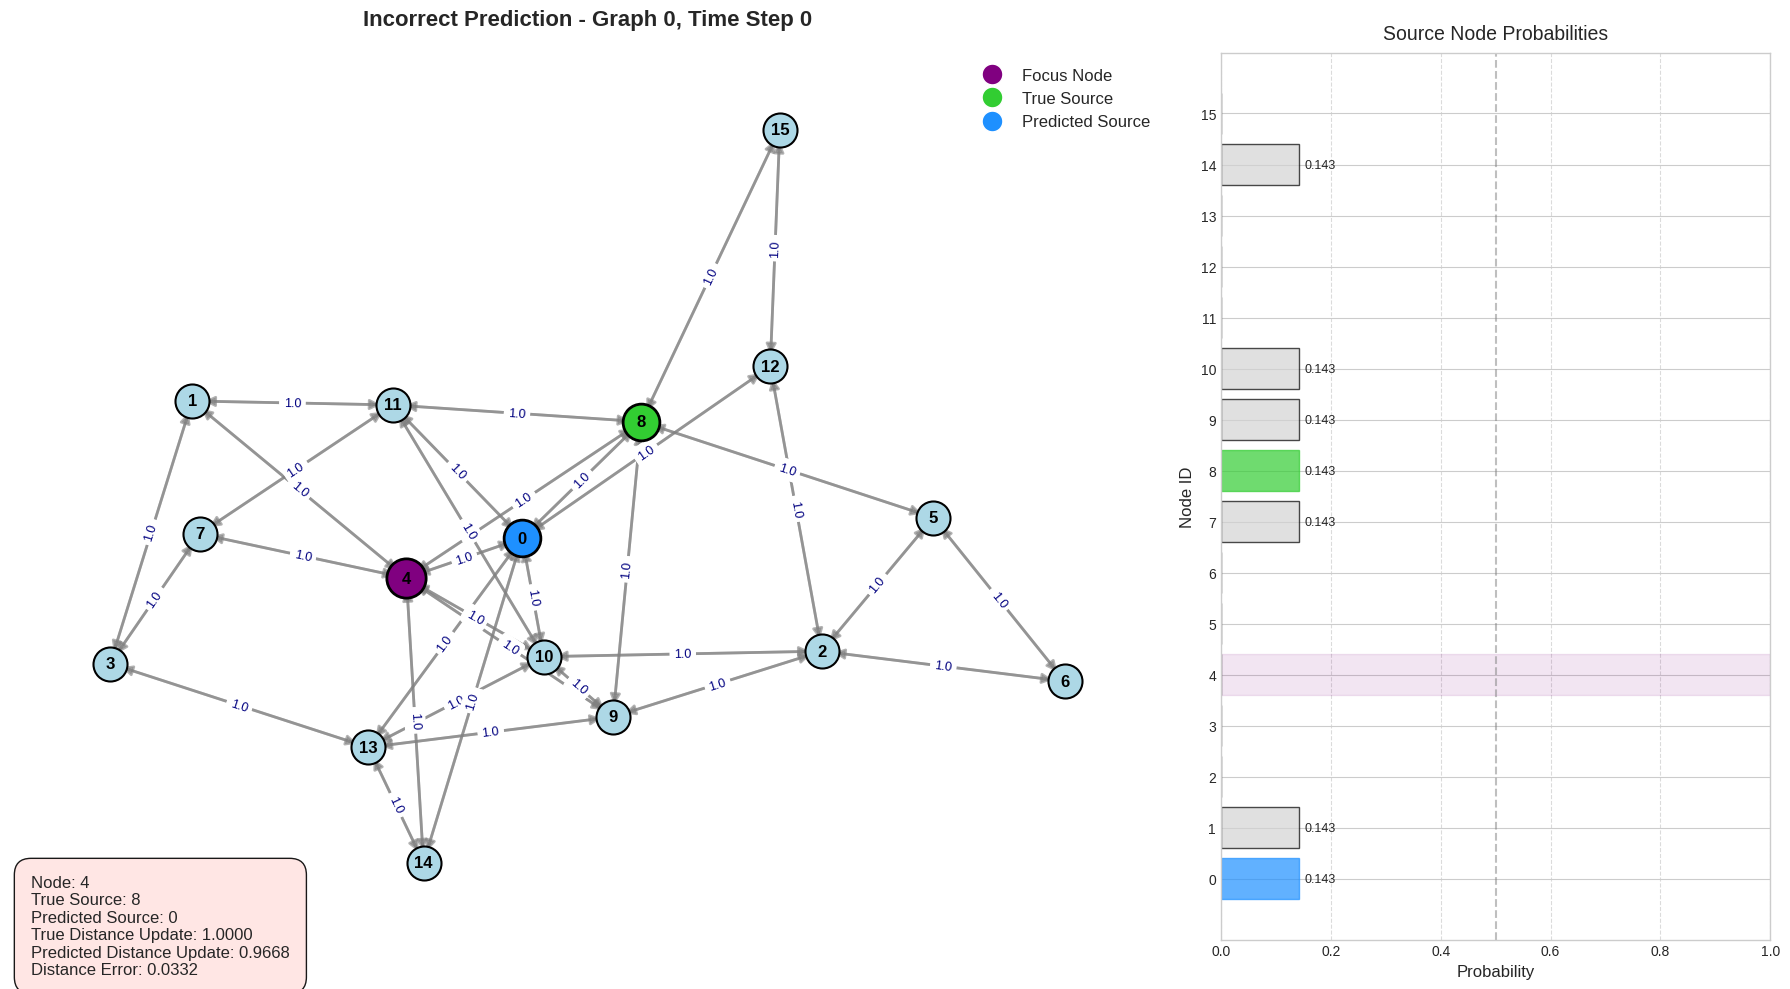


Visualizing error example 3...


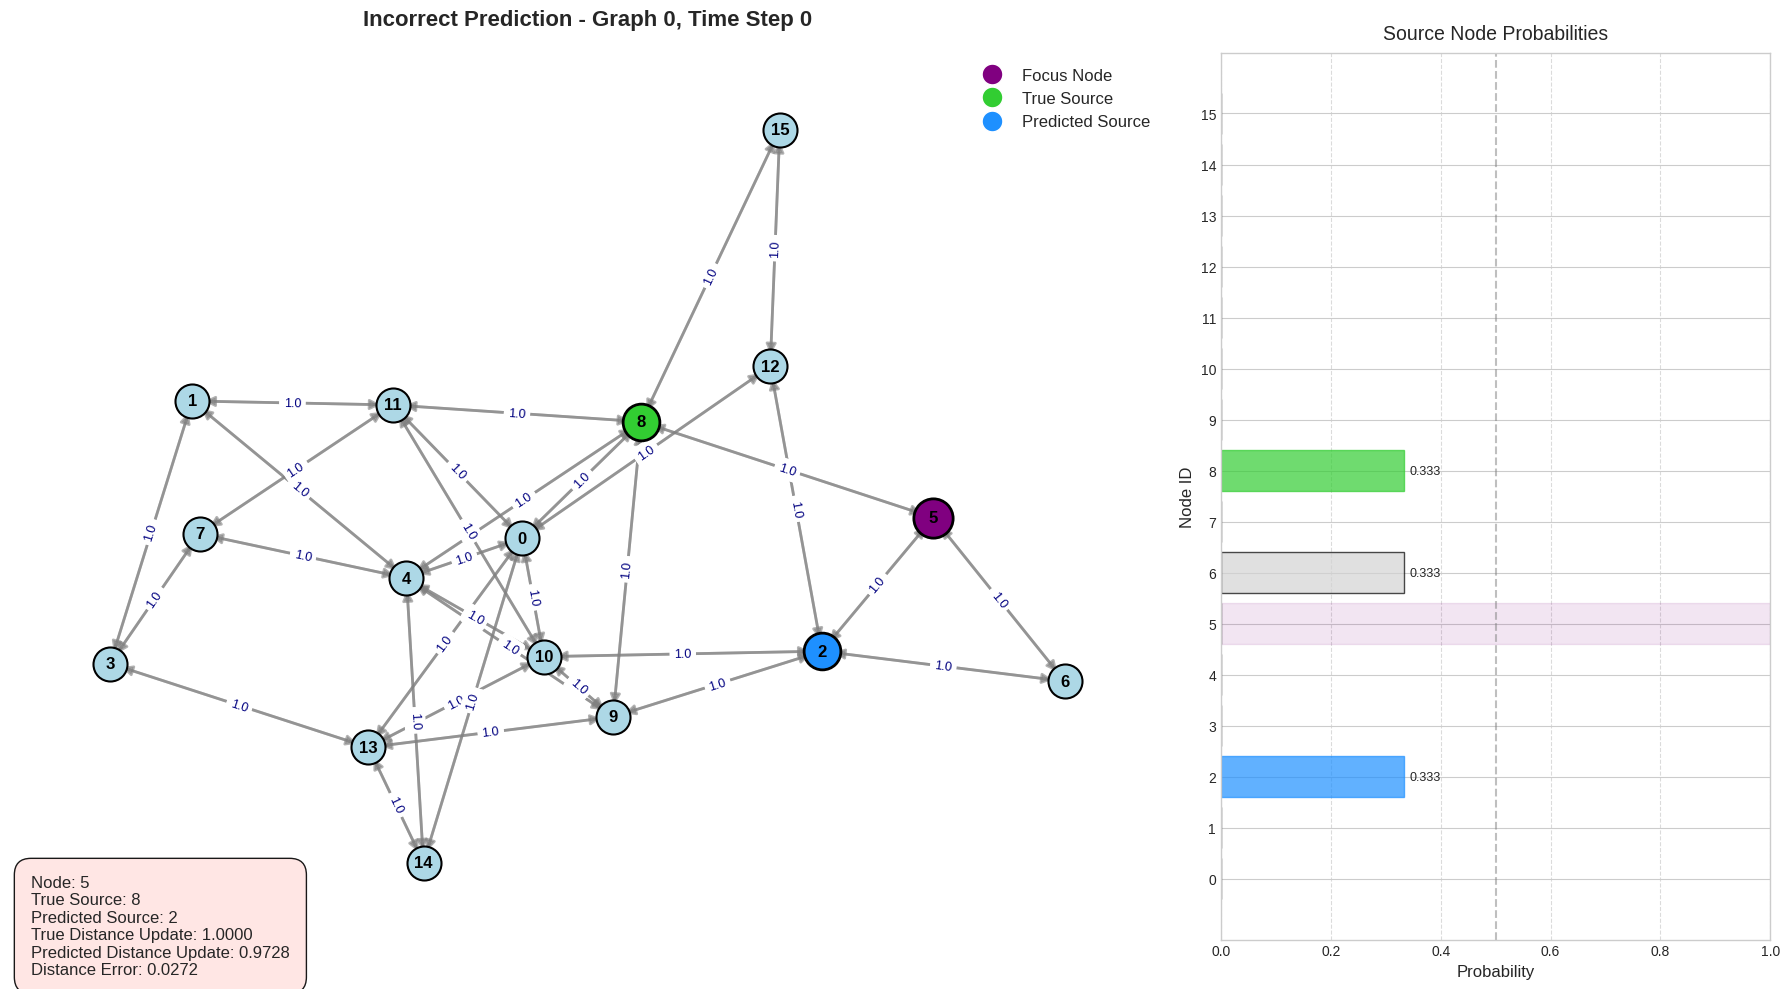


Visualizing error example 4...


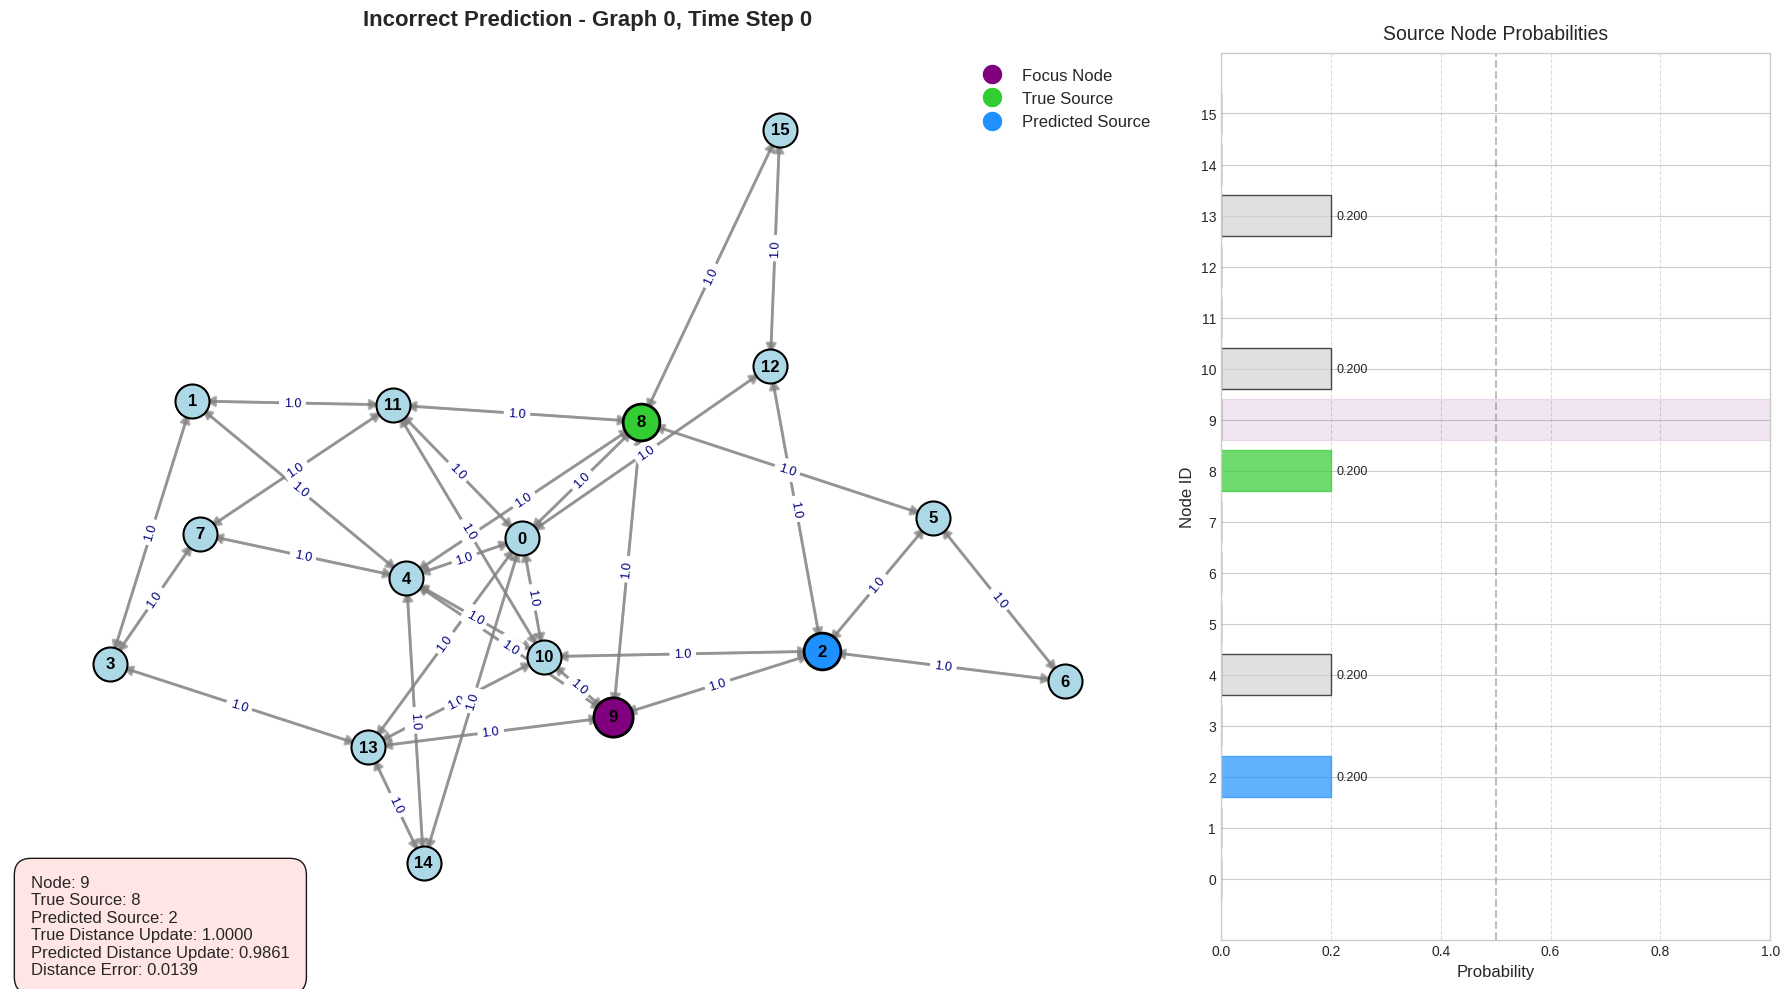


Visualizing error example 5...


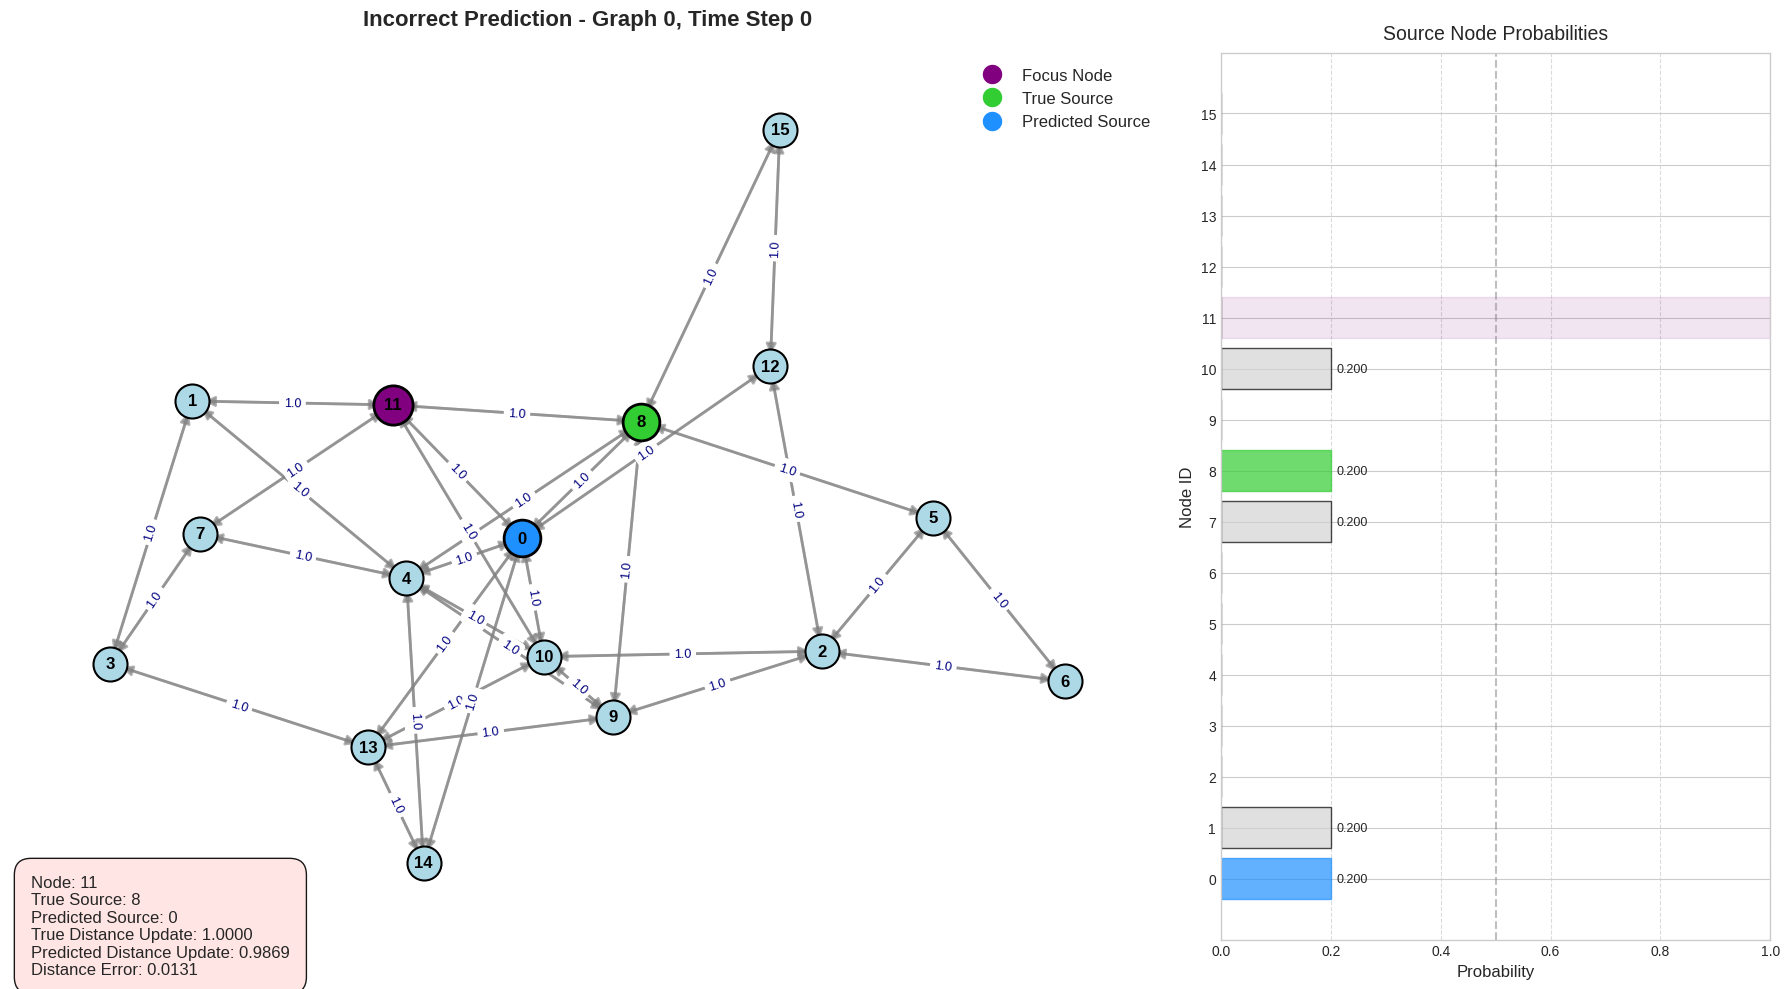


Analyzing specific nodes (0 and 1)...

Visualizing node 0 example...


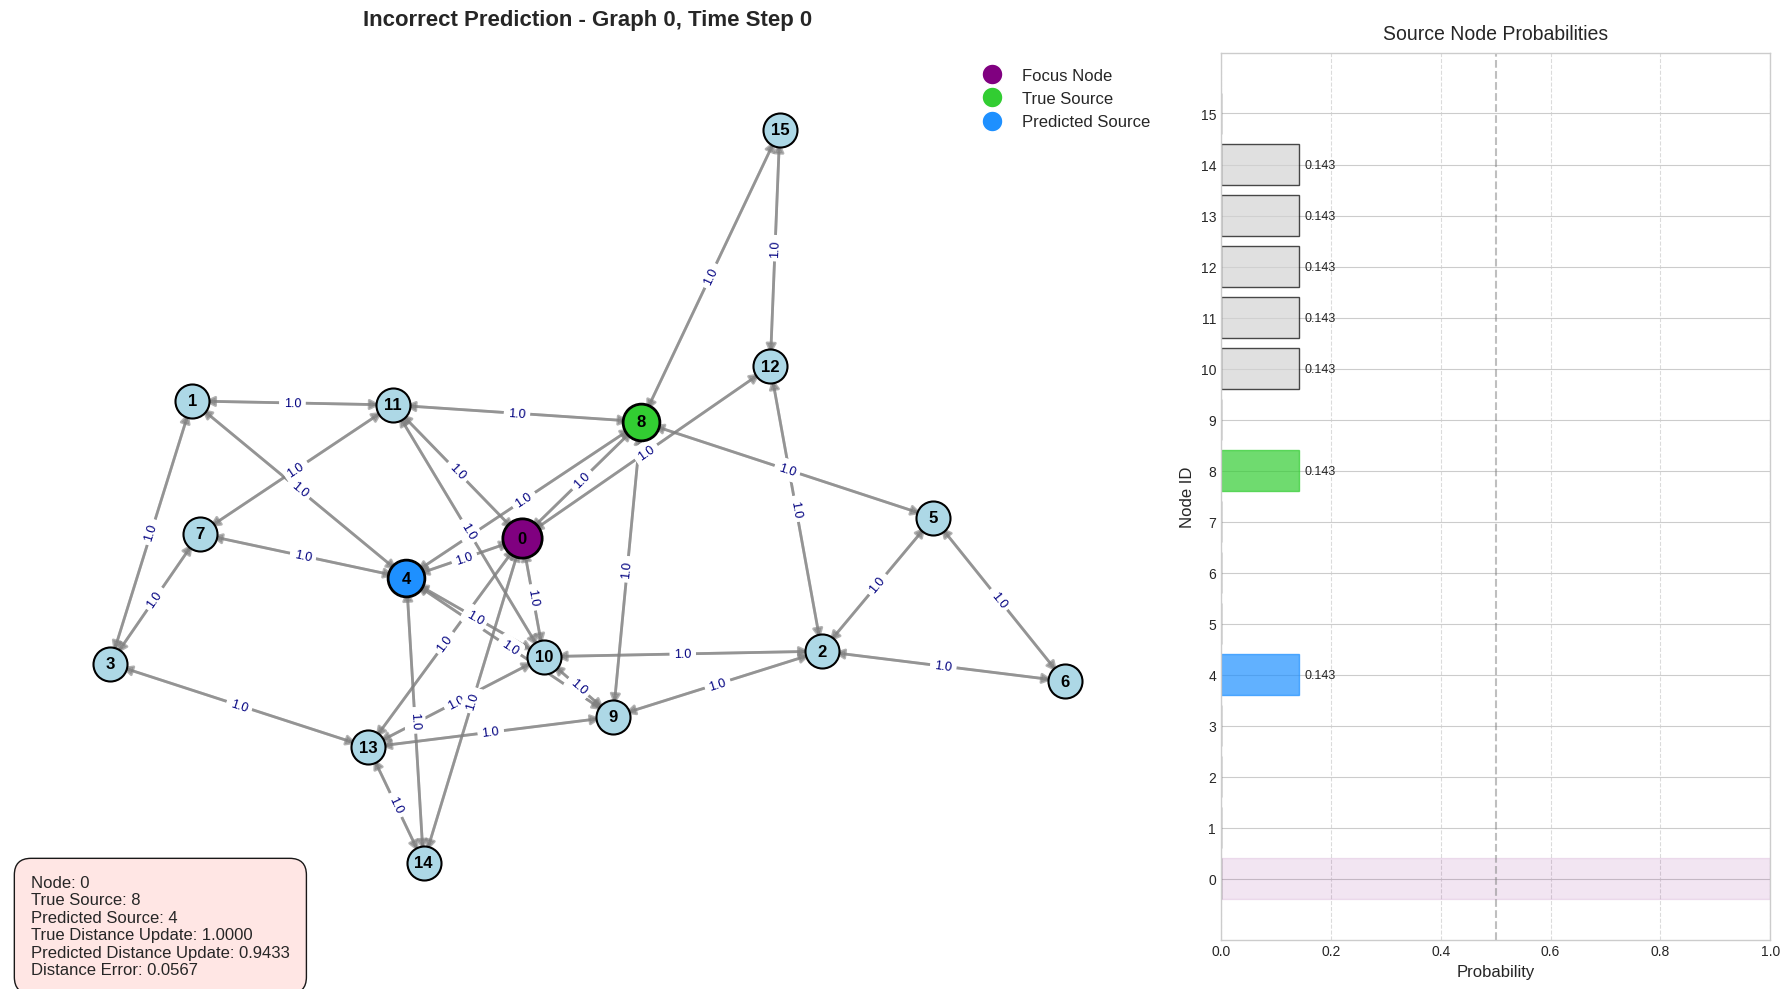


Visualizing node 1 example...


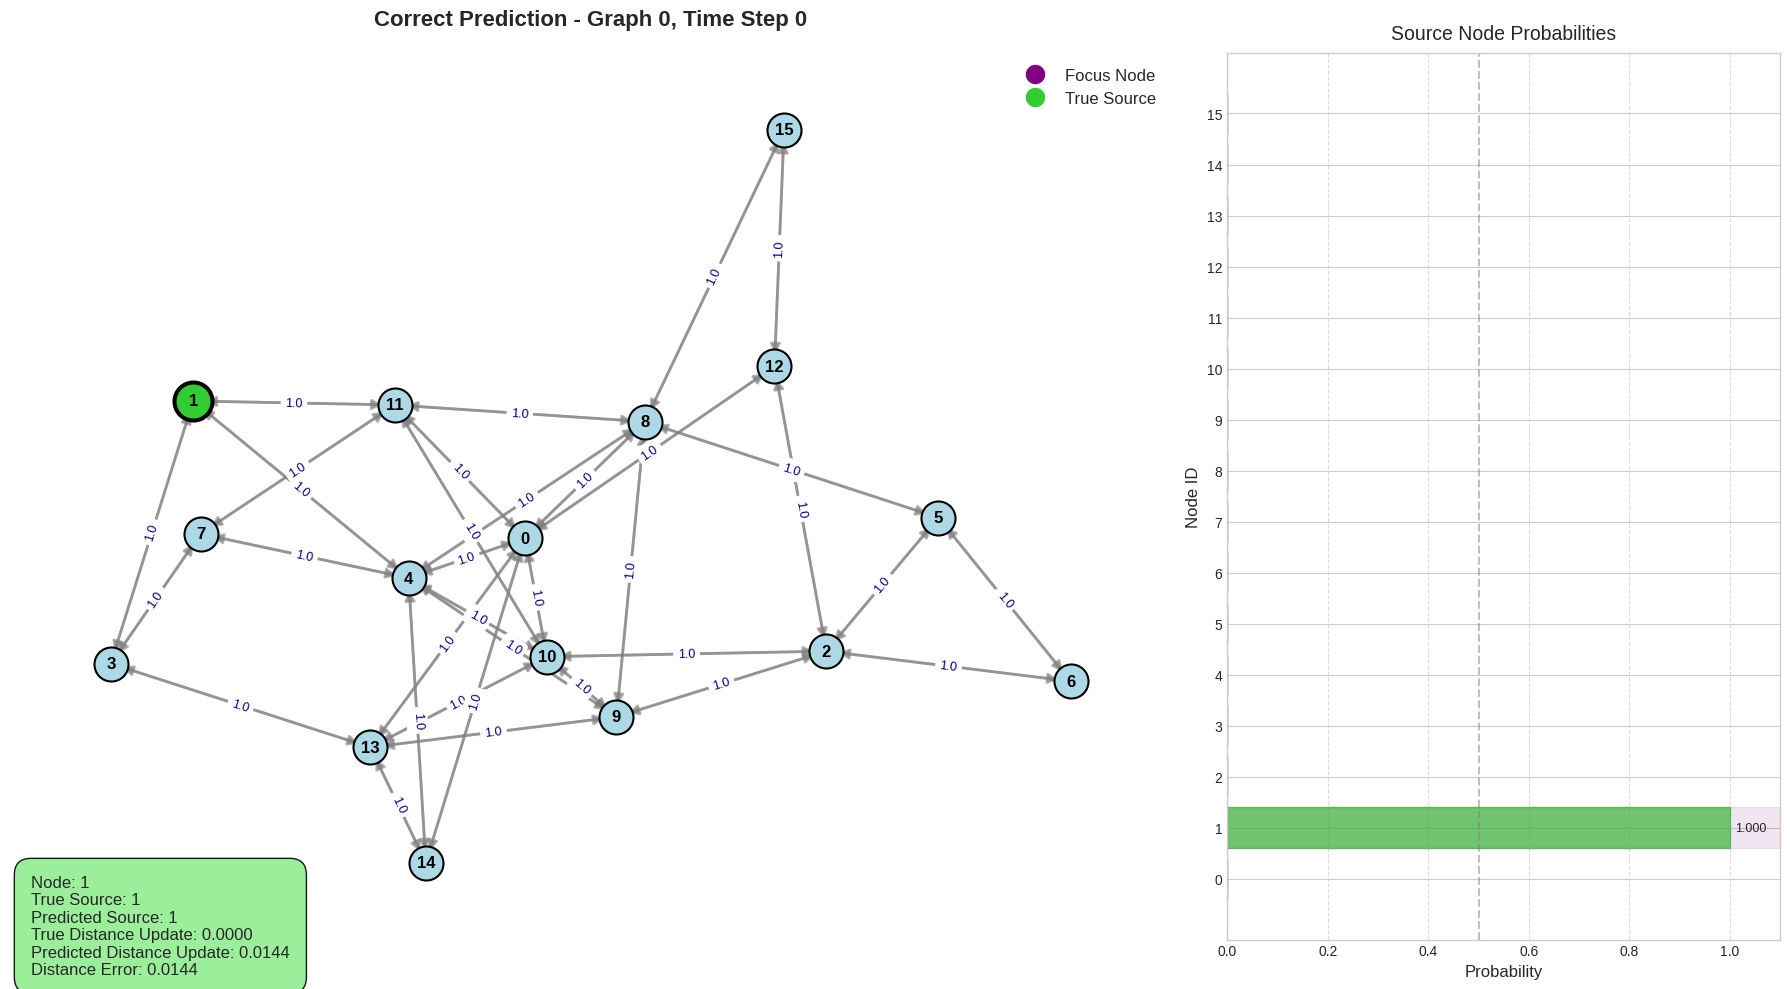


Visualizing node 0 example...


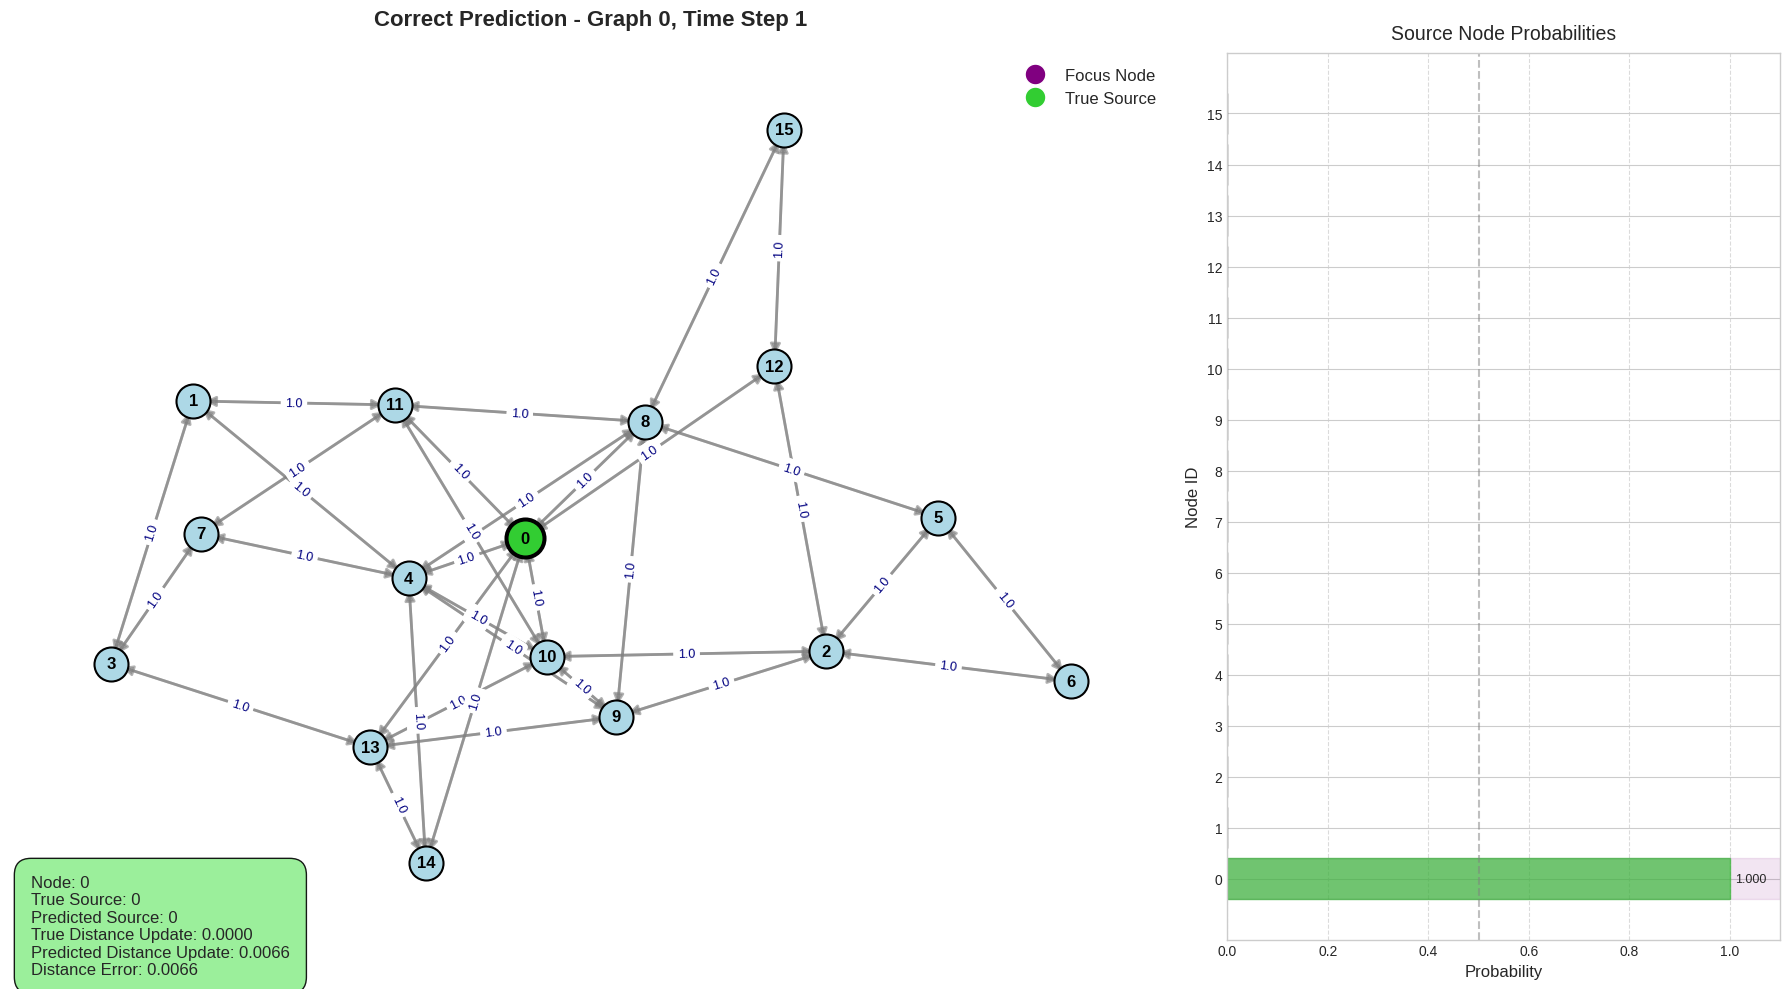


Visualizing node 1 example...


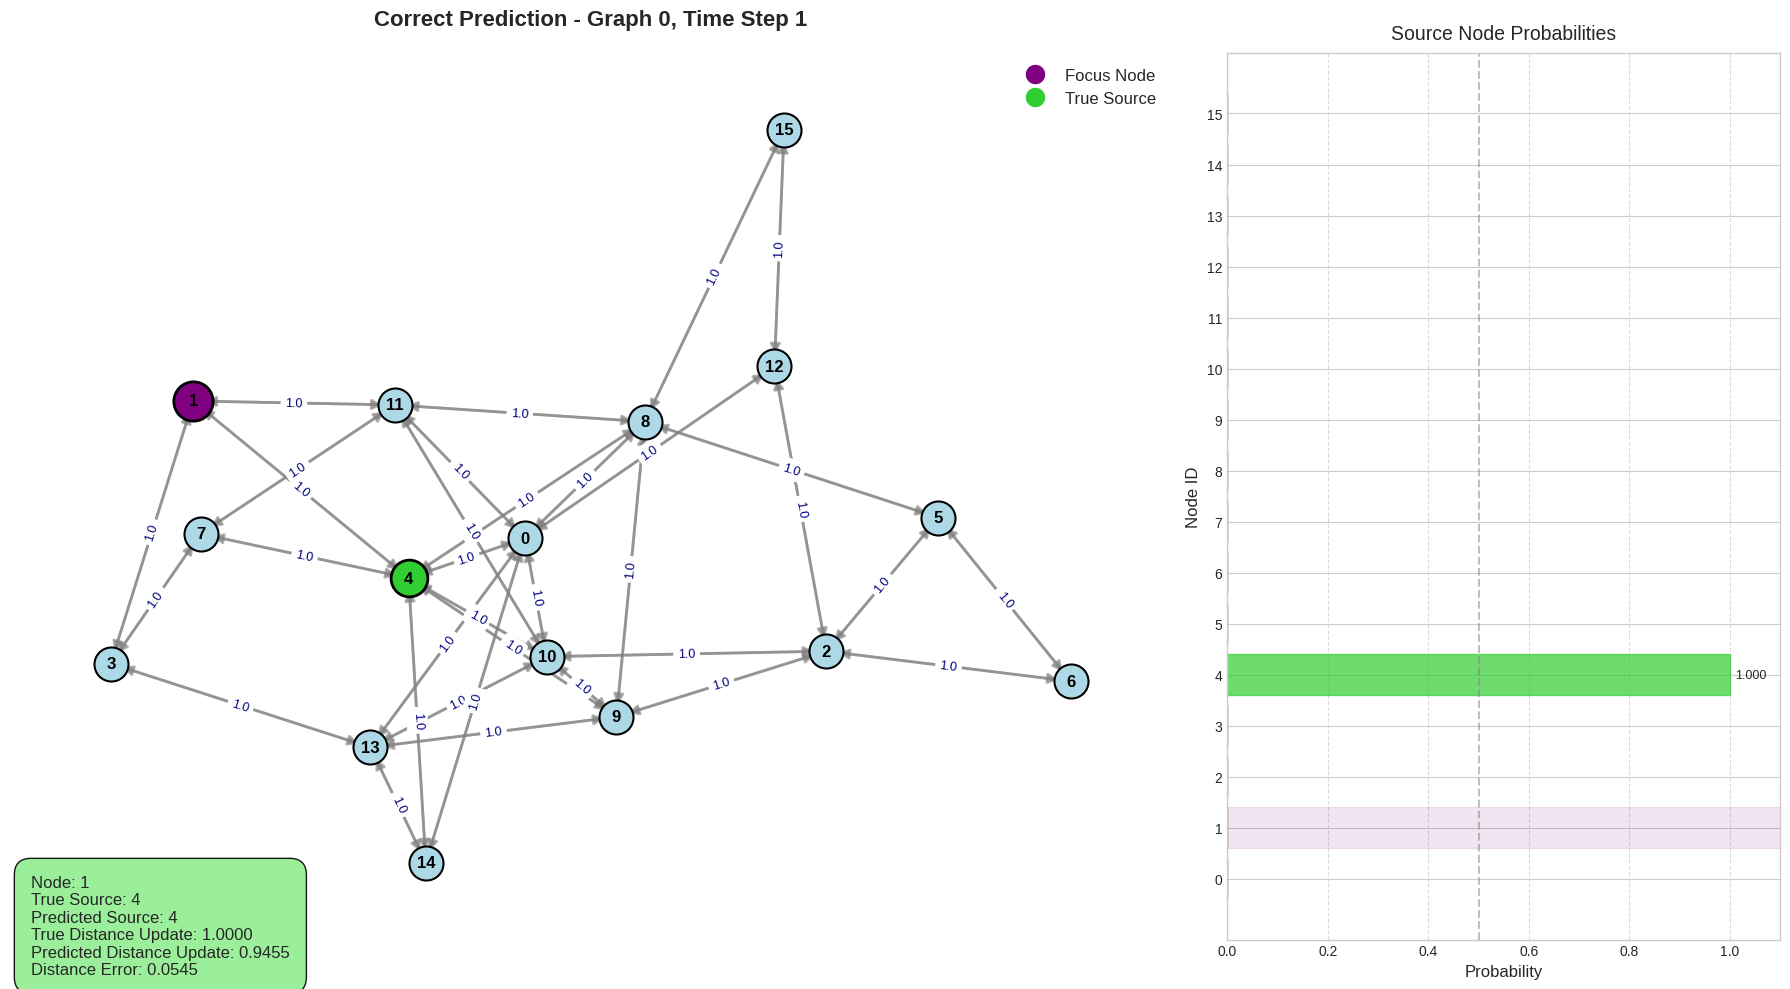


Visualizing node 0 example...


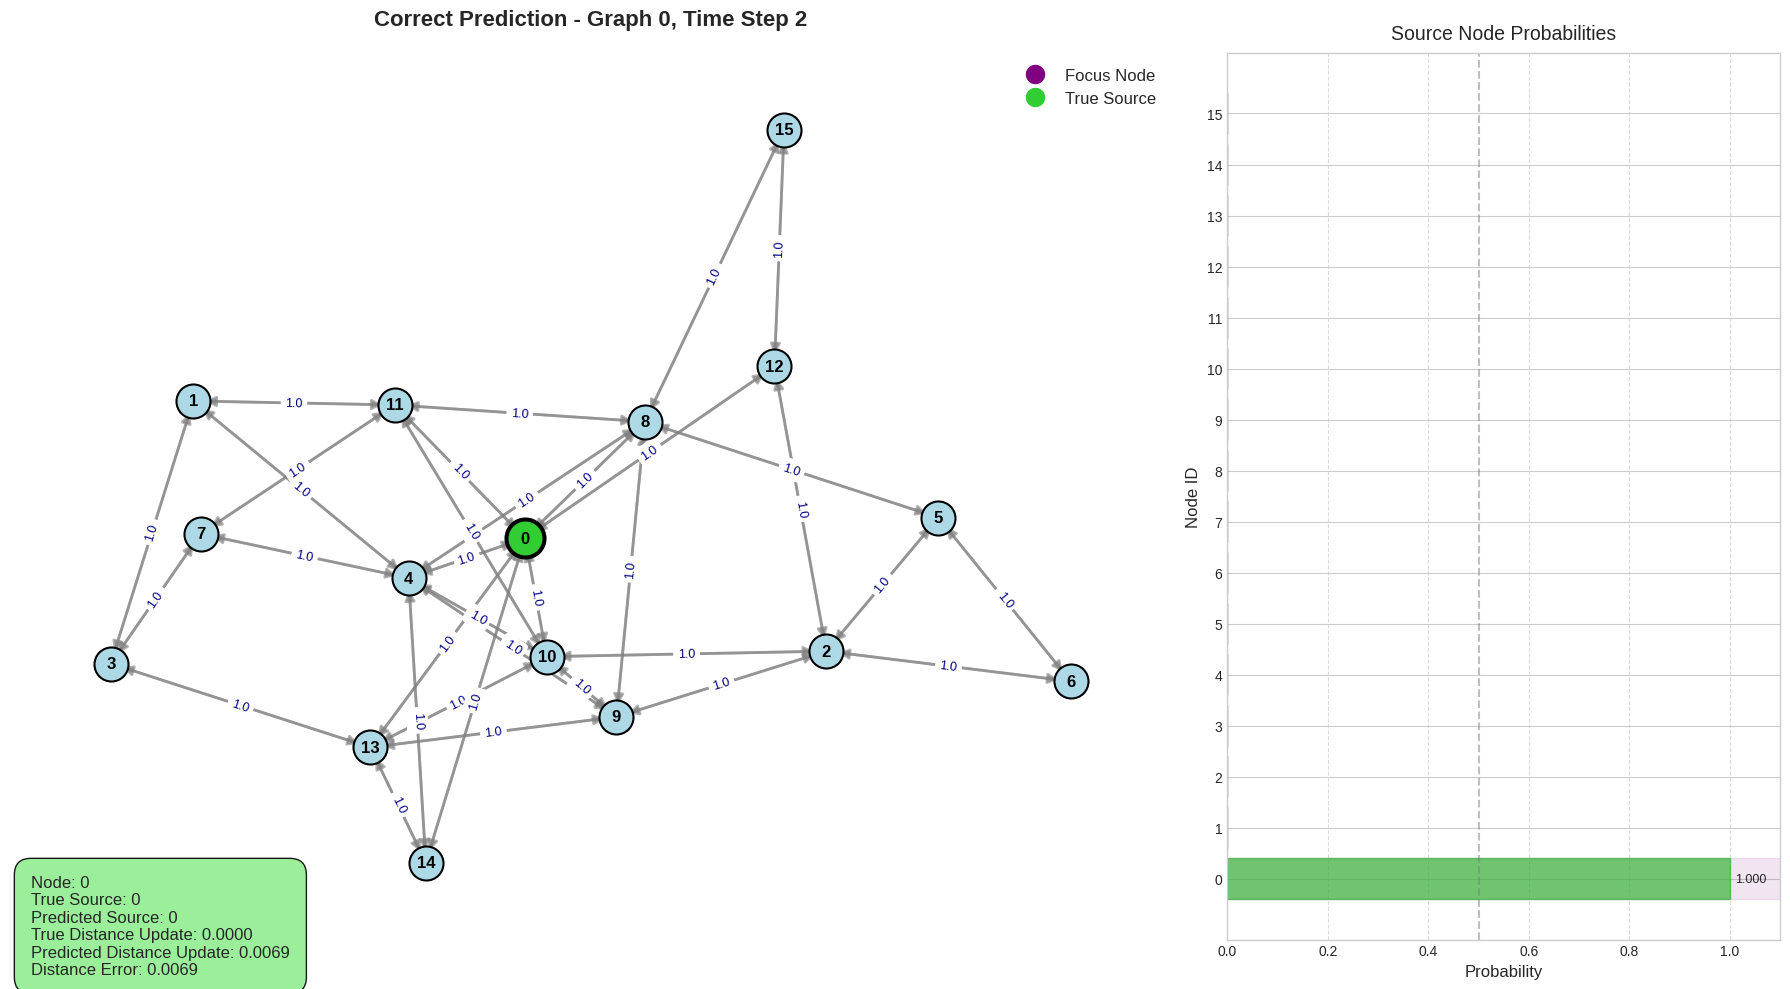


Creating summary visualization of 30 examples...


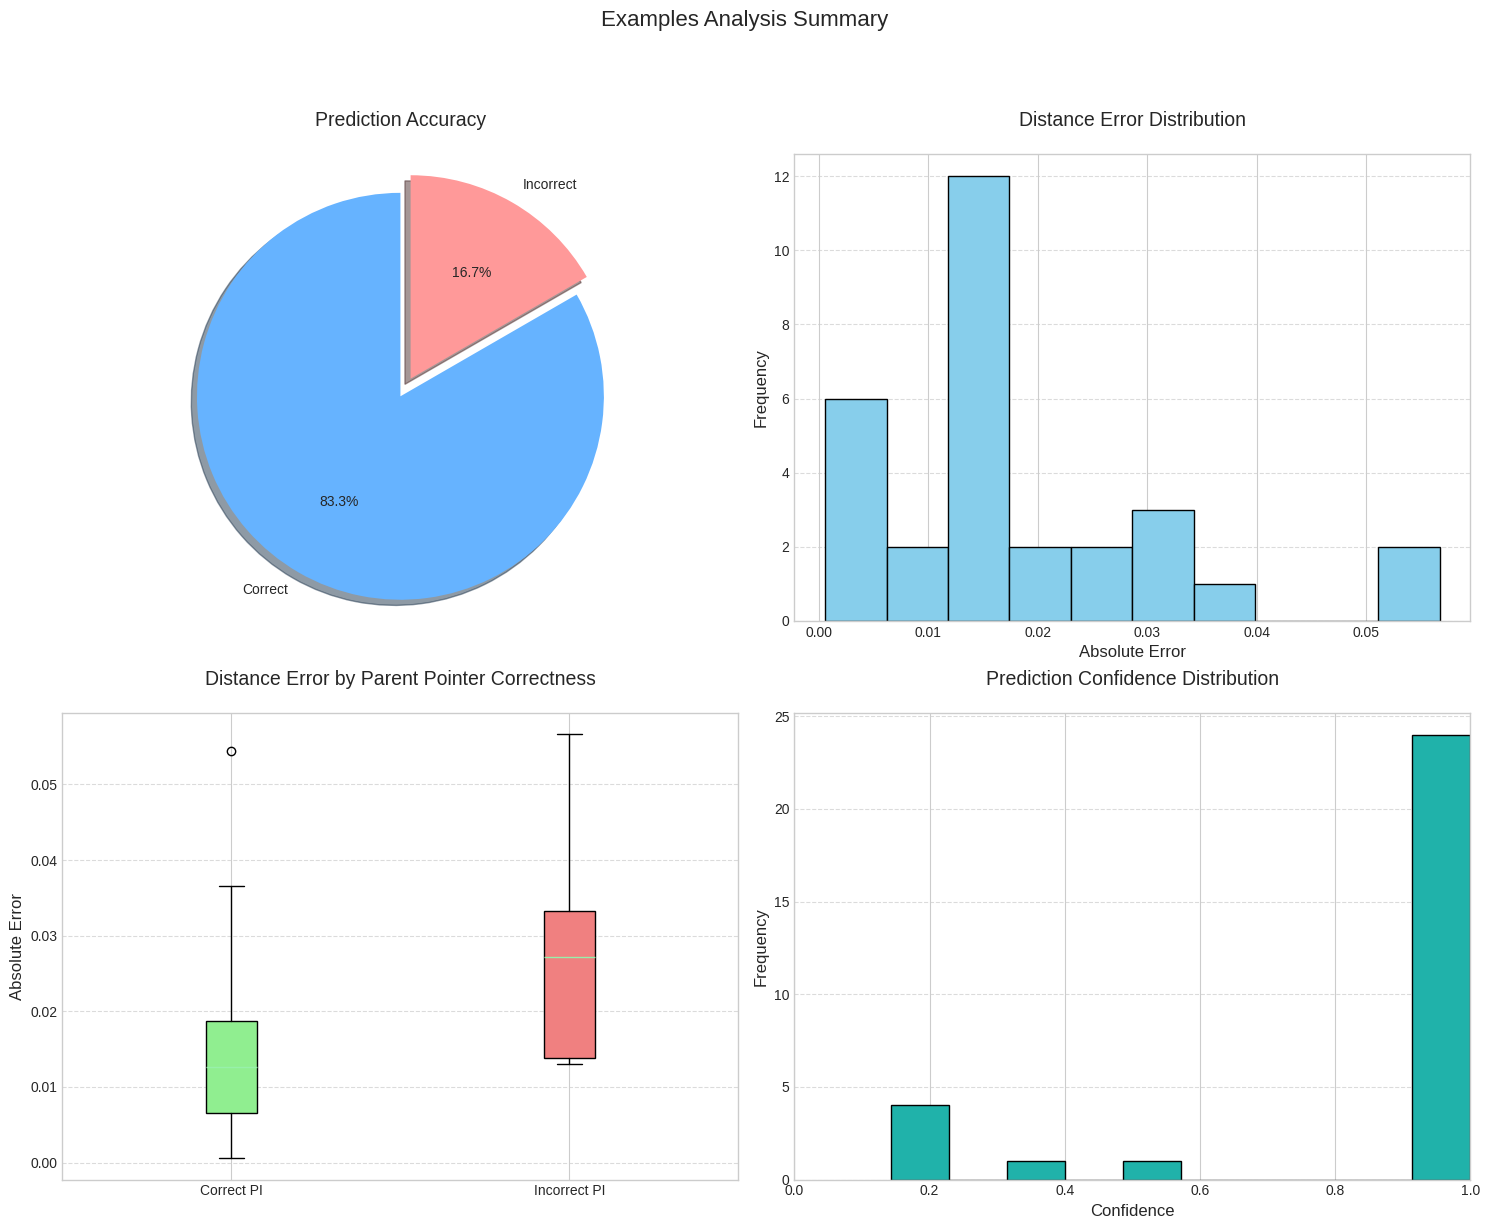

In [ ]:
# Import the new analysis functions
from interp.evaluation import analyze_examples, visualize_example, visualize_examples_summary, analyze_model_behavior

# Load a model for analysis
from interp.config import create_model_from_config, load_config
import torch
import os

# Choose an algorithm and model to analyze
alg = "bfs"  # or "bellman_ford" or "bellman_ford_bfs" for joint models
model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

# Load the model
config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)
model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

# Choose a dataset for analysis
dataset_path = os.path.join("data", alg, "interp_data_16_eval.h5")
nested = False  # Set to True for joint models

# Create a dataset and dataloader
from interp.dataset import HDF5Dataset, custom_collate, nested_custom_collate
from torch.utils.data import DataLoader

dataset = HDF5Dataset(dataset_path, nested=nested)
collate_fn = nested_custom_collate if nested else custom_collate
dataloader = DataLoader(dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Option 1: Comprehensive model behavior analysis
print("Performing comprehensive model behavior analysis...")
results, examples = analyze_model_behavior(model, dataloader, device, num_examples=50)

# Option 2: Analyze specific examples
print("\nCollecting a mix of correct and incorrect examples...")
mixed_examples = analyze_examples(model, dataloader, device, num_examples=10, error_only=False)

# Visualize the first few examples
for i, example in enumerate(mixed_examples[:5]):
    print(f"\nVisualizing example {i+1} ({'correct' if example['is_correct'] else 'incorrect'})...")
    visualize_example(example)

# Option 3: Focus on error examples only
print("\nCollecting error examples only...")
error_examples = analyze_examples(model, dataloader, device, num_examples=5, error_only=True)

# Visualize all error examples
for i, example in enumerate(error_examples):
    print(f"\nVisualizing error example {i+1}...")
    visualize_example(example)

# Visualize node-specific examples
for i, example in enumerate(node_examples):
    print(f"\nVisualizing node {example['node_idx']} example...")
    visualize_example(example)

# Option 5: Create a summary visualization of a larger set of examples
print("\nCreating summary visualization of 30 examples...")
summary_examples = analyze_examples(model, dataloader, device, num_examples=30)
visualize_examples_summary(summary_examples)

# Close the dataset when done
dataset.close()

## Analyse joint statistics

Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


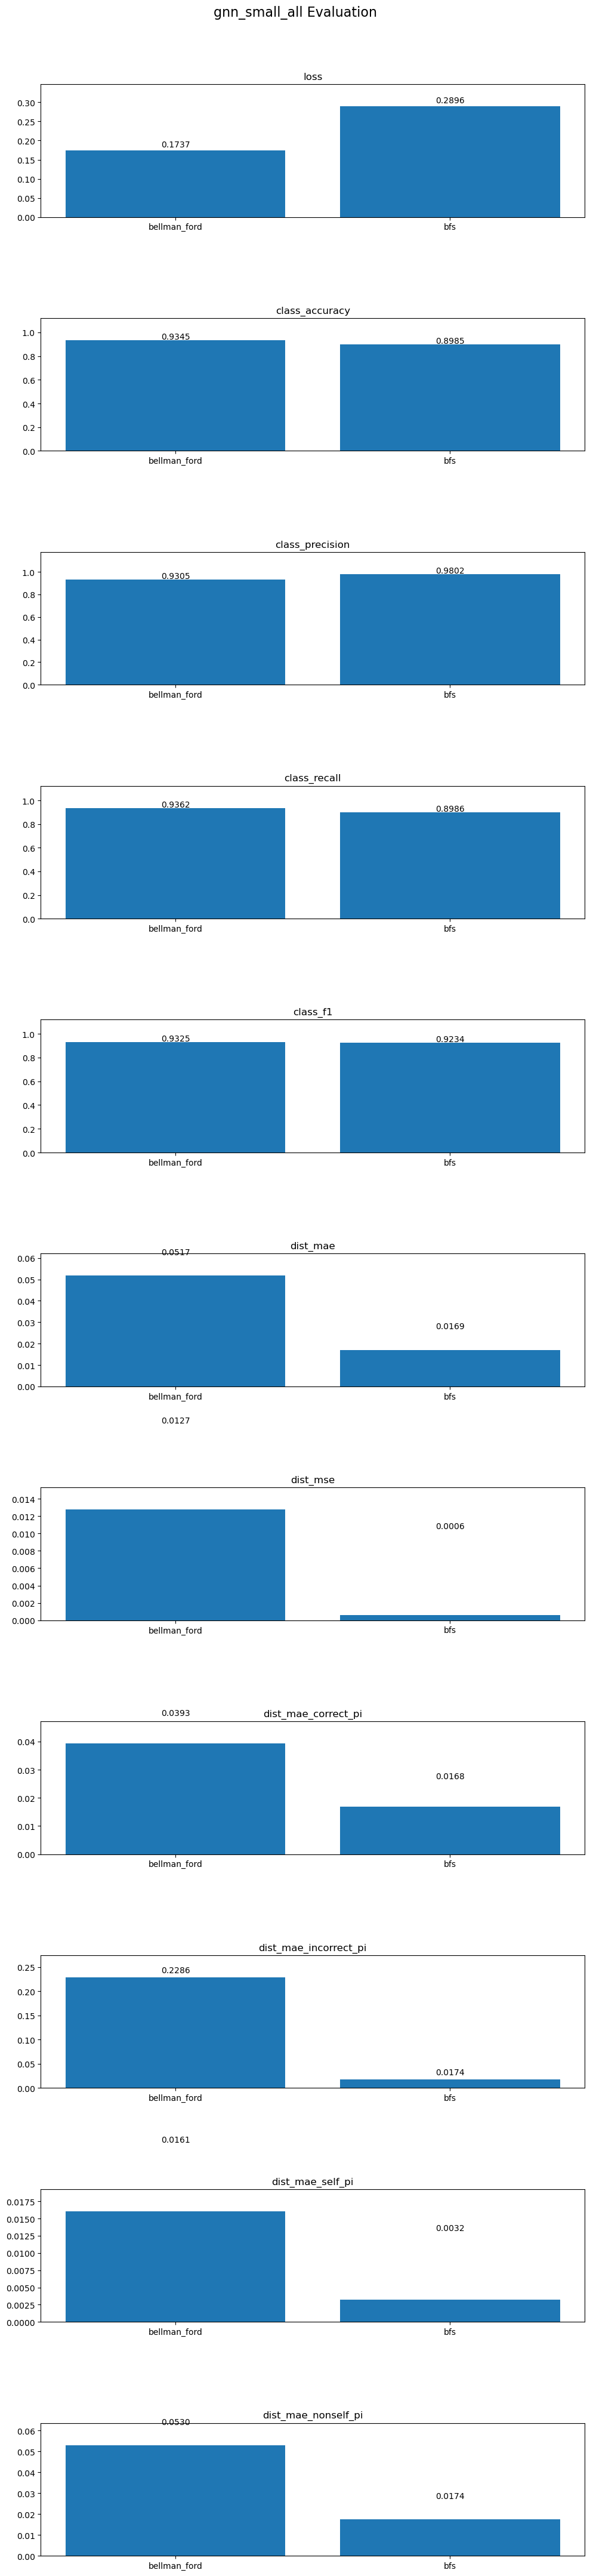

In [2]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/bellman_ford_bfs/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/bellman_ford_bfs/interp_data_OOD_eval.h5",
    batch_size=16,
    nested=True
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")
